# DSAI Project - Happiness
### Lab Group: FS2
### Contributors: 
   - Chua Kok Liang
   - Lester Tay
   - Dou Maokang
   
### Work Distribution:
   - Chua Kok Liang: Data exploration & visualization
   - Lester Tay: Data exploration & visualization
   - Dou Maokang: Machine Learning


### Content
<a id='mainPage'></a>
- [Main Page](#mainPage)
- [Data Cleaning](#DataCleaning)
- [Data Exploration](#DataExploration)
- [Machine Learning](#MachineLearning)

# Import Libraries

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.plotly as py
import plotly.graph_objs as go

sb.set() # set the default Seaborn style for graphics
import warnings
warnings.filterwarnings("ignore")

In [3]:
# import the original dataset
df = pd.read_excel('happiness.xls', sheet_name = 'Table2.1')
df.sample(n=5)

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
139,Benin,2015,3.624664,7.594465,0.434389,51.342953,0.733384,-0.001323,0.850098,0.592222,0.373397,0.514306,0.142651,-0.570188,2.048732,0.565220,0.478,0.432667,0.533303
1113,Philippines,2016,5.430833,8.886889,0.821299,60.130032,0.907596,-0.077418,0.791962,0.820969,0.290233,0.771627,-0.579913,-0.235285,2.470618,0.454924,NaN,0.418833,0.533456
1527,Vietnam,2016,5.062267,8.692030,0.876324,66.075638,0.894351,-0.090152,0.799240,0.536226,0.222550,NaN,-0.619272,-0.197976,1.767819,0.349215,NaN,0.364286,0.436878
145,Bolivia,2006,5.373986,8.483932,0.834280,55.629147,0.770135,-0.037944,0.794484,0.739243,0.431945,0.536309,-0.363172,-0.722363,1.819213,0.338522,0.569,0.531643,NaN
687,Japan,2014,5.922621,10.527361,0.900040,74.631966,0.838052,-0.156489,0.617483,0.741508,0.189433,0.379515,1.002343,1.562861,1.893251,0.319664,NaN,0.321000,0.424433


In [4]:
print("No. of countries: ", len(df["country"].unique()))

No. of countries:  164


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562 entries, 0 to 1561
Data columns (total 19 columns):
country                                                     1562 non-null object
year                                                        1562 non-null int64
Life Ladder                                                 1562 non-null float64
Log GDP per capita                                          1535 non-null float64
Social support                                              1549 non-null float64
Healthy life expectancy at birth                            1553 non-null float64
Freedom to make life choices                                1533 non-null float64
Generosity                                                  1482 non-null float64
Perceptions of corruption                                   1472 non-null float64
Positive affect                                             1544 non-null float64
Negative affect                                             1550 non-null fl

In [6]:
df.columns

Index(['country', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-15',
       'gini of household income reported in Gallup, by wp5-year'],
      dtype='object')

In [7]:
df.isnull().sum()

country                                                       0
year                                                          0
Life Ladder                                                   0
Log GDP per capita                                           27
Social support                                               13
Healthy life expectancy at birth                              9
Freedom to make life choices                                 29
Generosity                                                   80
Perceptions of corruption                                    90
Positive affect                                              18
Negative affect                                              12
Confidence in national government                           161
Democratic Quality                                          171
Delivery Quality                                            171
Standard deviation of ladder by country-year                  0
Standard deviation/Mean of ladder by cou

## DataCleaning

### Content
<a id='DataCleaning'></a>
- [Main Page](#mainPage)
- [Data Cleaning](#DataCleaning)
- [Data Exploration](#DataExploration)
- [Machine Learning](#MachineLearning)

In [8]:
df_clean = df[['country', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'gini of household income reported in Gallup, by wp5-year']]
df_clean.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,"gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,0.344540


In [9]:
# Change variable names

df_clean.columns = df_clean.columns.str.upper()

# Rename "Life ladder" to "HAPPINESS"
df_clean.rename(columns = {"LIFE LADDER": "HAPPINESS",
                          "HEALTHY LIFE EXPECTANCY AT BIRTH": "LIFE EXPECTANCY",
                          "FREEDOM TO MAKE LIFE CHOICES": "FREEDOM",
                          str.upper('gini of household income reported in Gallup, by wp5-year'): "GINI"}, 
                inplace = True)
df_clean.head()

,COUNTRY,YEAR,HAPPINESS,LOG GDP PER CAPITA,SOCIAL SUPPORT,LIFE EXPECTANCY,FREEDOM,GENEROSITY,PERCEPTIONS OF CORRUPTION,POSITIVE AFFECT,NEGATIVE AFFECT,CONFIDENCE IN NATIONAL GOVERNMENT,DEMOCRATIC QUALITY,DELIVERY QUALITY,GINI
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,0.344540


In [10]:
df_clean.isnull().sum()

COUNTRY                                0
YEAR                                   0
HAPPINESS                              0
LOG GDP PER CAPITA                    27
SOCIAL SUPPORT                        13
LIFE EXPECTANCY                        9
FREEDOM                               29
GENEROSITY                            80
PERCEPTIONS OF CORRUPTION             90
POSITIVE AFFECT                       18
NEGATIVE AFFECT                       12
CONFIDENCE IN NATIONAL GOVERNMENT    161
DEMOCRATIC QUALITY                   171
DELIVERY QUALITY                     171
GINI                                 357
dtype: int64

## How to deal with null data?

In [11]:
df_clean[df_clean['GINI'].isnull()==True]

,COUNTRY,YEAR,HAPPINESS,LOG GDP PER CAPITA,SOCIAL SUPPORT,LIFE EXPECTANCY,FREEDOM,GENEROSITY,PERCEPTIONS OF CORRUPTION,POSITIVE AFFECT,NEGATIVE AFFECT,CONFIDENCE IN NATIONAL GOVERNMENT,DEMOCRATIC QUALITY,DELIVERY QUALITY,GINI
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,NaN
10,Albania,2007,4.634252,9.077325,0.821372,66.576630,0.528605,-0.016183,0.874700,0.552678,0.246335,0.300681,-0.045108,-0.420024,NaN
26,Angola,2011,5.589001,8.684613,0.723094,50.894405,0.583702,0.064475,0.911320,0.658647,0.361063,0.232387,-0.747358,-1.215250,NaN
27,Angola,2012,4.360250,8.699287,0.752593,51.521790,0.456029,-0.124706,0.906300,0.557908,0.304890,0.237091,-0.732785,-1.124386,NaN
30,Argentina,2006,6.312925,9.716692,0.938463,65.987427,0.733004,-0.156324,0.851799,0.824682,0.328230,0.517504,0.203246,-0.399083,NaN
31,Argentina,2007,6.073158,9.792596,0.862206,66.128609,0.652833,-0.140862,0.881058,0.827920,0.279008,0.405824,0.273740,-0.404018,NaN
32,Argentina,2008,5.961034,9.822107,0.892195,66.269424,0.678222,-0.131774,0.864996,0.823409,0.318222,0.286371,0.136837,-0.499129,NaN
42,Armenia,2006,4.289311,8.717719,0.681877,63.302216,0.520198,-0.217386,0.849513,0.494121,0.469419,0.344337,-0.502482,-0.296808,NaN
43,Armenia,2007,4.881516,8.855183,0.759644,63.391285,0.605411,-0.238381,0.817445,0.507101,0.411717,0.387620,-0.304466,-0.336200,NaN
44,Armenia,2008,4.651972,8.930409,0.709486,63.507126,0.462157,-0.202992,0.876099,0.520710,0.384892,0.464447,-0.433497,-0.220863,NaN


In [12]:
for var in df_clean.columns[2:]:
    if (df_clean[var].isnull().sum()>0):

        for country in df_clean["COUNTRY"].unique():
            country_df = df_clean[df_clean['COUNTRY']==country].copy()  # extract dataframe for each country

            if (country_df[var].isnull().sum()>0):
                country_df[var] = country_df[var].replace(np.nan, country_df[var].mean())
                df_clean.update(country_df[var])

In [13]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562 entries, 0 to 1561
Data columns (total 15 columns):
COUNTRY                              1562 non-null object
YEAR                                 1562 non-null int64
HAPPINESS                            1562 non-null float64
LOG GDP PER CAPITA                   1550 non-null float64
SOCIAL SUPPORT                       1561 non-null float64
LIFE EXPECTANCY                      1553 non-null float64
FREEDOM                              1562 non-null float64
GENEROSITY                           1549 non-null float64
PERCEPTIONS OF CORRUPTION            1540 non-null float64
POSITIVE AFFECT                      1561 non-null float64
NEGATIVE AFFECT                      1562 non-null float64
CONFIDENCE IN NATIONAL GOVERNMENT    1488 non-null float64
DEMOCRATIC QUALITY                   1530 non-null float64
DELIVERY QUALITY                     1530 non-null float64
GINI                                 1556 non-null float64
dtypes: flo

In [14]:
df_clean.isnull().sum()

COUNTRY                               0
YEAR                                  0
HAPPINESS                             0
LOG GDP PER CAPITA                   12
SOCIAL SUPPORT                        1
LIFE EXPECTANCY                       9
FREEDOM                               0
GENEROSITY                           13
PERCEPTIONS OF CORRUPTION            22
POSITIVE AFFECT                       1
NEGATIVE AFFECT                       0
CONFIDENCE IN NATIONAL GOVERNMENT    74
DEMOCRATIC QUALITY                   32
DELIVERY QUALITY                     32
GINI                                  6
dtype: int64


# Add a column 'REGION'

In [15]:
region_info = pd.read_excel('happiness.xls', sheet_name = 'SupportingFactors')
region_info = region_info[["country", "Region indicator"]]
region_info = region_info.set_index("country", drop = False)
region_info.head()

,country,Region indicator
country,,
Afghanistan,Afghanistan,South Asia
Albania,Albania,Central and Eastern Europe
Algeria,Algeria,Middle East and North Africa
Angola,Angola,Sub-Saharan Africa
Argentina,Argentina,Latin America and Caribbean


No. of countries:  156
No. of regions:  10


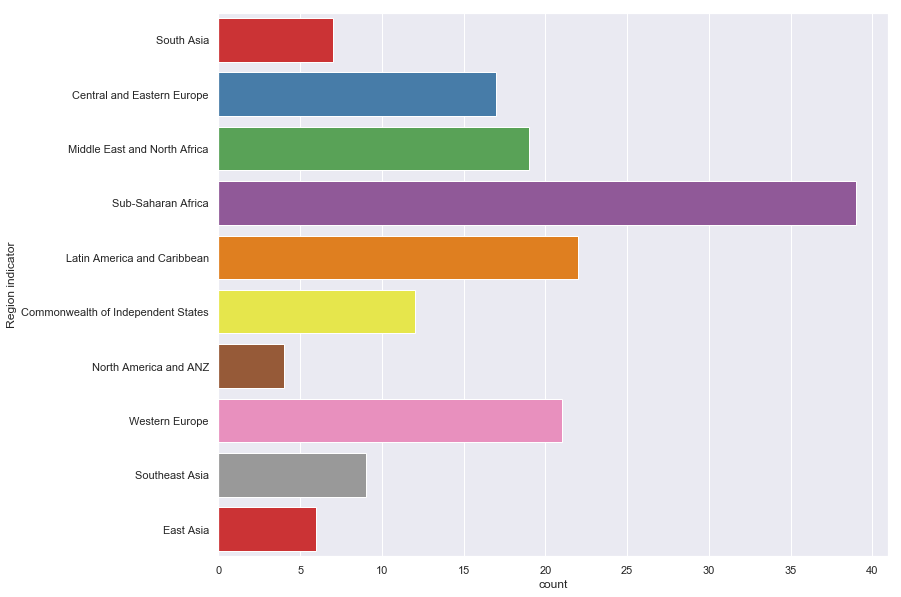

In [16]:
print("No. of countries: ", len(region_info["country"].unique()))
print("No. of regions: ", len(region_info["Region indicator"].unique()))
f, axes = plt.subplots(1, 1, figsize=(12, 10))
sb.countplot(y = "Region indicator", data = region_info, palette="Set1")

In [17]:
df_clean['REGION'] = np.nan

In [18]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562 entries, 0 to 1561
Data columns (total 16 columns):
COUNTRY                              1562 non-null object
YEAR                                 1562 non-null int64
HAPPINESS                            1562 non-null float64
LOG GDP PER CAPITA                   1550 non-null float64
SOCIAL SUPPORT                       1561 non-null float64
LIFE EXPECTANCY                      1553 non-null float64
FREEDOM                              1562 non-null float64
GENEROSITY                           1549 non-null float64
PERCEPTIONS OF CORRUPTION            1540 non-null float64
POSITIVE AFFECT                      1561 non-null float64
NEGATIVE AFFECT                      1562 non-null float64
CONFIDENCE IN NATIONAL GOVERNMENT    1488 non-null float64
DEMOCRATIC QUALITY                   1530 non-null float64
DELIVERY QUALITY                     1530 non-null float64
GINI                                 1556 non-null float64
REGION     

In [19]:
missing_ctr = []

for country in df_clean['COUNTRY']:
    try:
        country_df = df_clean[df_clean['COUNTRY']==country].copy()
        country_df['REGION'] = country_df['REGION'].replace(np.nan, region_info.loc[country]["Region indicator"])
        df_clean.update(country_df['REGION'])
    except:
        print("Cannot find: ", country)
        if country not in missing_ctr:
            missing_ctr.append(country)

Cannot find:  Comoros
Cannot find:  Comoros
Cannot find:  Comoros
Cannot find:  Comoros
Cannot find:  Cuba
Cannot find:  Djibouti
Cannot find:  Djibouti
Cannot find:  Djibouti
Cannot find:  Djibouti
Cannot find:  Guyana
Cannot find:  Oman
Cannot find:  Somaliland region
Cannot find:  Somaliland region
Cannot find:  Somaliland region
Cannot find:  Somaliland region
Cannot find:  Suriname
Cannot find:  Swaziland


In [20]:
for var in missing_ctr:
    df_clean = df_clean[df_clean["COUNTRY"]!=var]

In [21]:
len(df_clean)

1545

In [22]:
print("No. of countries: ", len(df_clean["COUNTRY"].unique()))
print("No. of regions: ", len(df_clean["REGION"].unique()))

No. of countries:  156
No. of regions:  10


In [23]:
df_clean.isnull().sum()

COUNTRY                               0
YEAR                                  0
HAPPINESS                             0
LOG GDP PER CAPITA                    8
SOCIAL SUPPORT                        0
LIFE EXPECTANCY                       5
FREEDOM                               0
GENEROSITY                            8
PERCEPTIONS OF CORRUPTION            20
POSITIVE AFFECT                       0
NEGATIVE AFFECT                       0
CONFIDENCE IN NATIONAL GOVERNMENT    73
DEMOCRATIC QUALITY                   28
DELIVERY QUALITY                     28
GINI                                  0
REGION                                0
dtype: int64

In [24]:
for var in df_clean.columns[2:]:
    if (df_clean[var].isnull().sum()>0):

        for country in df_clean["REGION"].unique():
            country_df = df_clean[df_clean['REGION']==country].copy()  # extract dataframe for each country

            if (country_df[var].isnull().sum()>0):
                country_df[var] = country_df[var].replace(np.nan, country_df[var].mean())
                df_clean.update(country_df[var])

In [25]:
df_clean.isnull().sum()

COUNTRY                              0
YEAR                                 0
HAPPINESS                            0
LOG GDP PER CAPITA                   0
SOCIAL SUPPORT                       0
LIFE EXPECTANCY                      0
FREEDOM                              0
GENEROSITY                           0
PERCEPTIONS OF CORRUPTION            0
POSITIVE AFFECT                      0
NEGATIVE AFFECT                      0
CONFIDENCE IN NATIONAL GOVERNMENT    0
DEMOCRATIC QUALITY                   0
DELIVERY QUALITY                     0
GINI                                 0
REGION                               0
dtype: int64

In [26]:
df_clean.sample(n=10)

,COUNTRY,YEAR,HAPPINESS,LOG GDP PER CAPITA,SOCIAL SUPPORT,LIFE EXPECTANCY,FREEDOM,GENEROSITY,PERCEPTIONS OF CORRUPTION,POSITIVE AFFECT,NEGATIVE AFFECT,CONFIDENCE IN NATIONAL GOVERNMENT,DEMOCRATIC QUALITY,DELIVERY QUALITY,GINI,REGION
691,Jordan,2005,6.294660,9.082460,0.920013,62.822838,0.738291,-0.102328,0.669727,0.695953,0.239560,0.800150,-0.324023,0.176887,0.351958,Middle East and North Africa
35,Argentina,2011,6.775805,9.884781,0.889073,66.694588,0.815802,-0.174472,0.754646,0.840048,0.231855,0.607538,0.251968,-0.442329,0.347596,Latin America and Caribbean
1445,Ukraine,2014,4.297330,9.017177,0.876760,63.165558,0.533267,0.101574,0.926789,0.594337,0.248560,0.242529,-1.081533,-0.706851,0.412379,Commonwealth of Independent States
840,Madagascar,2016,3.663086,7.241846,0.746497,56.645138,0.569645,-0.061460,0.864171,0.813191,0.204255,0.490199,-0.333082,-0.873781,0.479676,Sub-Saharan Africa
493,Germany,2013,6.965125,10.666965,0.931421,70.553177,0.894313,0.013549,0.565794,0.743487,0.204996,0.557761,1.167084,1.639718,0.376837,Western Europe
1321,Sweden,2015,7.288922,10.729400,0.929460,72.484001,0.935072,0.198151,0.231964,0.817942,0.190992,0.499302,1.256156,1.977544,0.365593,Western Europe
694,Jordan,2009,5.999859,9.184935,0.899034,63.378036,0.770954,-0.076204,0.739464,0.644645,0.264641,0.785837,-0.569441,0.229841,0.348918,Middle East and North Africa
476,Georgia,2008,4.156090,8.765312,0.607513,63.685177,0.613997,-0.207156,0.497999,0.440980,0.261508,0.507007,-0.588482,0.101258,0.450287,Commonwealth of Independent States
1307,Sudan,2011,4.314456,8.197446,0.817786,52.997498,0.582539,-0.030171,0.662519,0.585826,0.248501,0.553298,-2.147116,-1.286357,0.563913,Sub-Saharan Africa
437,Estonia,2016,5.649675,10.243349,0.937715,67.199493,0.842771,-0.158623,0.639085,0.726255,0.176869,0.339834,0.946931,1.317938,0.343597,Central and Eastern Europe


In [27]:
df_clean['YEAR'] = df_clean['YEAR'].astype('object')

In [28]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1545 entries, 0 to 1561
Data columns (total 16 columns):
COUNTRY                              1545 non-null object
YEAR                                 1545 non-null object
HAPPINESS                            1545 non-null float64
LOG GDP PER CAPITA                   1545 non-null float64
SOCIAL SUPPORT                       1545 non-null float64
LIFE EXPECTANCY                      1545 non-null float64
FREEDOM                              1545 non-null float64
GENEROSITY                           1545 non-null float64
PERCEPTIONS OF CORRUPTION            1545 non-null float64
POSITIVE AFFECT                      1545 non-null float64
NEGATIVE AFFECT                      1545 non-null float64
CONFIDENCE IN NATIONAL GOVERNMENT    1545 non-null float64
DEMOCRATIC QUALITY                   1545 non-null float64
DELIVERY QUALITY                     1545 non-null float64
GINI                                 1545 non-null float64
REGION    

In [29]:
df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
count,1562.000000,1562.000000,1535.000000,1549.000000,1553.000000,1533.000000,1482.000000,1472.000000,1544.000000,1550.000000,1401.000000,1391.000000,1391.000000,1562.000000,1562.000000,583.000000,1386.000000,1205.000000
mean,2011.820743,5.433676,9.220822,0.810669,62.249887,0.728975,0.000079,0.753622,0.708969,0.263171,0.480207,-0.126617,0.004947,2.003501,0.387271,0.372846,0.386948,0.445204
std,3.419787,1.121017,1.184035,0.119370,7.960671,0.145408,0.164202,0.185538,0.107644,0.084006,0.190724,0.873259,0.981052,0.379684,0.119007,0.086609,0.083694,0.105410
min,2005.000000,2.661718,6.377396,0.290184,37.766476,0.257534,-0.322952,0.035198,0.362498,0.083426,0.068769,-2.448228,-2.144974,0.863034,0.133908,0.241000,0.228833,0.223470
25%,2009.000000,4.606351,8.310665,0.748304,57.299580,0.633754,-0.114313,0.697359,0.621471,0.204116,0.334732,-0.772010,-0.717463,1.737934,0.309722,0.307000,0.321583,0.368531
50%,2012.000000,5.332600,9.398610,0.833047,63.803192,0.748014,-0.022638,0.808115,0.717398,0.251798,0.463137,-0.225939,-0.210142,1.960345,0.369751,0.349000,0.371000,0.425395
75%,2015.000000,6.271025,10.190634,0.904329,68.098228,0.843628,0.094649,0.880089,0.800858,0.311515,0.610723,0.665944,0.717996,2.215920,0.451833,0.433500,0.433104,0.508579
max,2017.000000,8.018934,11.770276,0.987343,76.536362,0.985178,0.677773,0.983276,0.943621,0.704590,0.993604,1.540097,2.184725,3.527820,1.022769,0.648000,0.626000,0.961435


In [30]:
df_clean.describe()

,HAPPINESS,LOG GDP PER CAPITA,SOCIAL SUPPORT,LIFE EXPECTANCY,FREEDOM,GENEROSITY,PERCEPTIONS OF CORRUPTION,POSITIVE AFFECT,NEGATIVE AFFECT,CONFIDENCE IN NATIONAL GOVERNMENT,DEMOCRATIC QUALITY,DELIVERY QUALITY,GINI
count,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000
mean,5.439477,9.231282,0.811122,62.341928,0.730354,-0.000073,0.747078,0.708525,0.264079,0.489357,-0.120098,0.016476,0.447112
std,1.122116,1.183776,0.119352,7.949407,0.145044,0.163022,0.188431,0.107763,0.083708,0.193902,0.875751,0.978123,0.103710
min,2.661718,6.377396,0.290184,37.766476,0.257534,-0.322952,0.035198,0.362498,0.094316,0.068769,-2.448228,-2.144974,0.223470
25%,4.606651,8.326971,0.749633,57.552666,0.634792,-0.114353,0.690495,0.621293,0.205239,0.343570,-0.792791,-0.711075,0.371847
50%,5.343166,9.412086,0.833621,63.856758,0.748515,-0.021688,0.801420,0.716567,0.252653,0.476128,-0.212800,-0.184462,0.426913
75%,6.278378,10.212385,0.904579,68.248306,0.846185,0.094070,0.875225,0.800114,0.312088,0.612072,0.682029,0.721495,0.511728
max,8.018934,11.770276,0.987343,76.536362,0.985178,0.677773,0.983276,0.943621,0.704590,0.993604,1.540097,2.184725,0.961435


# Final Cleaned Dataset

In [31]:
dataset = df_clean.copy()

In [32]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1545 entries, 0 to 1561
Data columns (total 16 columns):
COUNTRY                              1545 non-null object
YEAR                                 1545 non-null object
HAPPINESS                            1545 non-null float64
LOG GDP PER CAPITA                   1545 non-null float64
SOCIAL SUPPORT                       1545 non-null float64
LIFE EXPECTANCY                      1545 non-null float64
FREEDOM                              1545 non-null float64
GENEROSITY                           1545 non-null float64
PERCEPTIONS OF CORRUPTION            1545 non-null float64
POSITIVE AFFECT                      1545 non-null float64
NEGATIVE AFFECT                      1545 non-null float64
CONFIDENCE IN NATIONAL GOVERNMENT    1545 non-null float64
DEMOCRATIC QUALITY                   1545 non-null float64
DELIVERY QUALITY                     1545 non-null float64
GINI                                 1545 non-null float64
REGION    

# DataExploration


### Content
<a id='DataExploration'></a>
- [Main Page](#mainPage)
- [Data Cleaning](#DataCleaning)
- [Data Exploration](#DataExploration)
- [Machine Learning](#MachineLearning)

In [33]:
dataset.shape

(1545, 16)

In [34]:
dataset.describe()

,HAPPINESS,LOG GDP PER CAPITA,SOCIAL SUPPORT,LIFE EXPECTANCY,FREEDOM,GENEROSITY,PERCEPTIONS OF CORRUPTION,POSITIVE AFFECT,NEGATIVE AFFECT,CONFIDENCE IN NATIONAL GOVERNMENT,DEMOCRATIC QUALITY,DELIVERY QUALITY,GINI
count,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000
mean,5.439477,9.231282,0.811122,62.341928,0.730354,-0.000073,0.747078,0.708525,0.264079,0.489357,-0.120098,0.016476,0.447112
std,1.122116,1.183776,0.119352,7.949407,0.145044,0.163022,0.188431,0.107763,0.083708,0.193902,0.875751,0.978123,0.103710
min,2.661718,6.377396,0.290184,37.766476,0.257534,-0.322952,0.035198,0.362498,0.094316,0.068769,-2.448228,-2.144974,0.223470
25%,4.606651,8.326971,0.749633,57.552666,0.634792,-0.114353,0.690495,0.621293,0.205239,0.343570,-0.792791,-0.711075,0.371847
50%,5.343166,9.412086,0.833621,63.856758,0.748515,-0.021688,0.801420,0.716567,0.252653,0.476128,-0.212800,-0.184462,0.426913
75%,6.278378,10.212385,0.904579,68.248306,0.846185,0.094070,0.875225,0.800114,0.312088,0.612072,0.682029,0.721495,0.511728
max,8.018934,11.770276,0.987343,76.536362,0.985178,0.677773,0.983276,0.943621,0.704590,0.993604,1.540097,2.184725,0.961435


In [35]:
dataset.corr()

,HAPPINESS,LOG GDP PER CAPITA,SOCIAL SUPPORT,LIFE EXPECTANCY,FREEDOM,GENEROSITY,PERCEPTIONS OF CORRUPTION,POSITIVE AFFECT,NEGATIVE AFFECT,CONFIDENCE IN NATIONAL GOVERNMENT,DEMOCRATIC QUALITY,DELIVERY QUALITY,GINI
HAPPINESS,1.000000,0.777056,0.701519,0.729357,0.518866,0.200903,-0.447421,0.555112,-0.276971,-0.076284,0.612406,0.705973,-0.301615
LOG GDP PER CAPITA,0.777056,1.000000,0.658488,0.843818,0.353761,0.002853,-0.382227,0.310120,-0.134024,-0.147810,0.636608,0.771489,-0.397563
SOCIAL SUPPORT,0.701519,0.658488,1.000000,0.586563,0.421493,0.075817,-0.228355,0.460528,-0.358883,-0.131195,0.538680,0.549667,-0.312073
LIFE EXPECTANCY,0.729357,0.843818,0.586563,1.000000,0.339471,0.047108,-0.322840,0.296970,-0.106602,-0.186390,0.599592,0.723563,-0.456931
FREEDOM,0.518866,0.353761,0.421493,0.339471,1.000000,0.349987,-0.502392,0.617384,-0.289605,0.407678,0.423800,0.461807,0.084845
GENEROSITY,0.200903,0.002853,0.075817,0.047108,0.349987,1.000000,-0.296785,0.371203,-0.102247,0.257110,0.120232,0.202790,0.215882
PERCEPTIONS OF CORRUPTION,-0.447421,-0.382227,-0.228355,-0.322840,-0.502392,-0.296785,1.000000,-0.305170,0.238246,-0.463953,-0.290980,-0.508960,-0.059359
POSITIVE AFFECT,0.555112,0.310120,0.460528,0.296970,0.617384,0.371203,-0.305170,1.000000,-0.385920,0.137623,0.374416,0.365391,0.091548
NEGATIVE AFFECT,-0.276971,-0.134024,-0.358883,-0.106602,-0.289605,-0.102247,0.238246,-0.385920,1.000000,-0.150353,-0.239114,-0.246577,0.128397
CONFIDENCE IN NATIONAL GOVERNMENT,-0.076284,-0.147810,-0.131195,-0.186390,0.407678,0.257110,-0.463953,0.137623,-0.150353,1.000000,-0.172991,-0.064865,0.182478


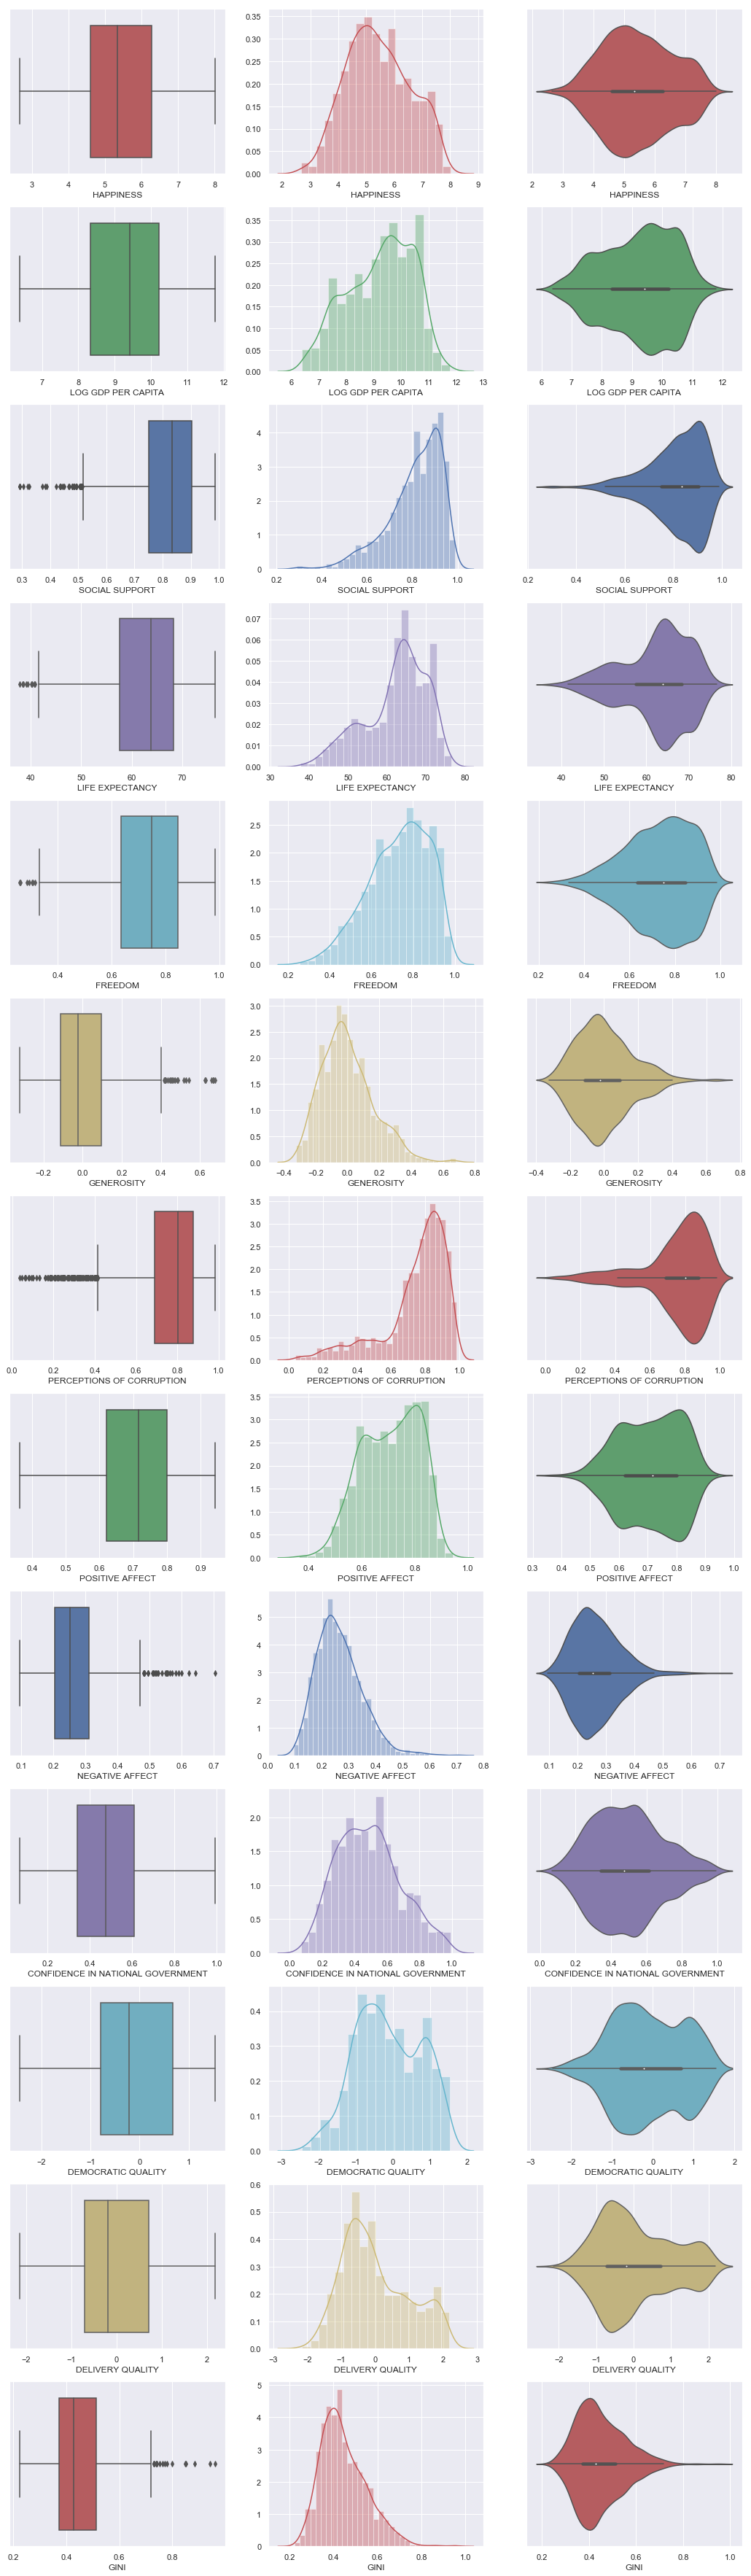

In [36]:
# Draw the distributions of all variables
f, axes = plt.subplots(13, 3, figsize=(18, 64))
colors = ["r", "g", "b", "m", "c", "y", "r", "g", "b", "m", "c", "y", "r", "g", "b", "m", "c", "y", "r", "g", "b"]

count = 0
for var in dataset.columns[2:-1]:
    sb.boxplot(dataset[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.distplot(dataset[var], color = colors[count], ax = axes[count,1])
    sb.violinplot(dataset[var], color = colors[count], ax = axes[count,2])
    count += 1

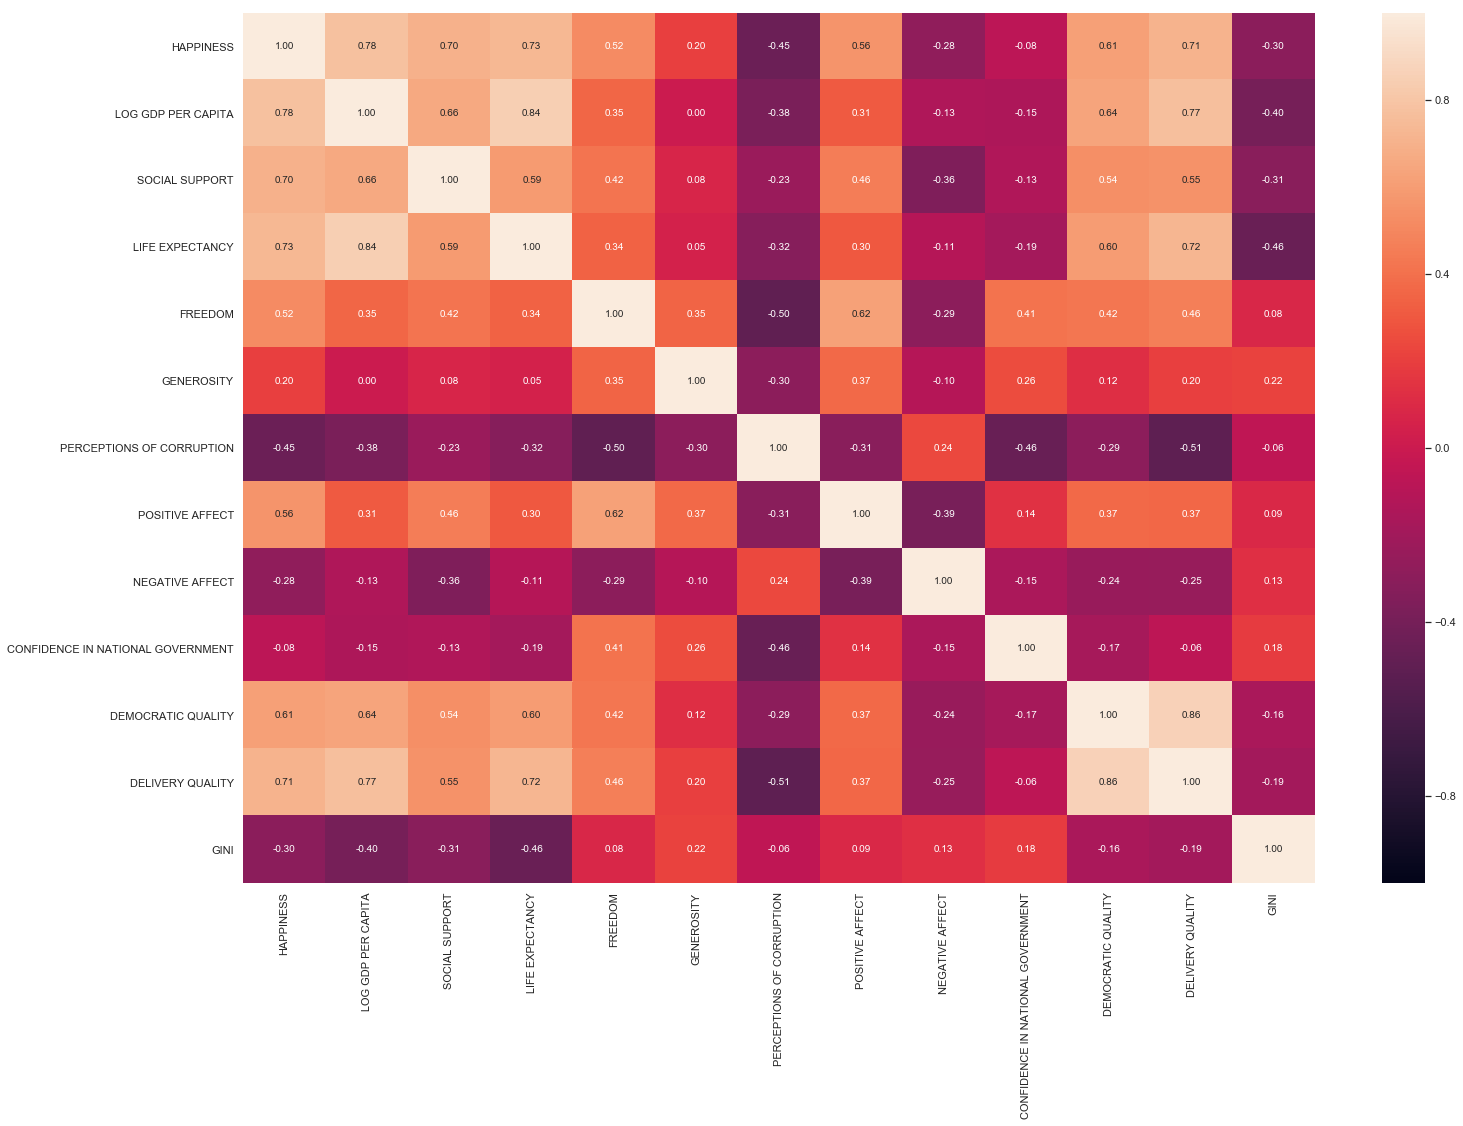

In [37]:
# Heatmap of the Correlation Matrix
f, axes = plt.subplots(1, 1, figsize=(24, 16))
sb.heatmap(dataset.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

### Observation:
   1. From the correlation heat map, we can see that HAPPINESS is strongly related to 4 variables, GDP, LE, DQ and SS. Also, this can be veried through the following joint plot.
   2. Additional, some variables are also correlated, such as GDP-LE, GDP-DQ, LE-DQ. This observation helps us selet suitable features for our machien learning part.


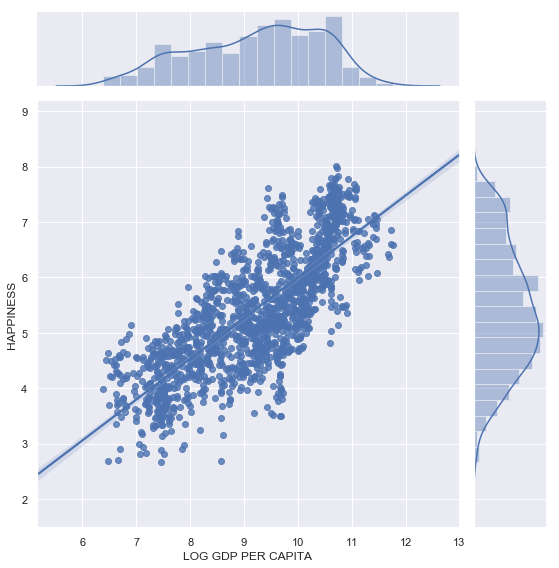

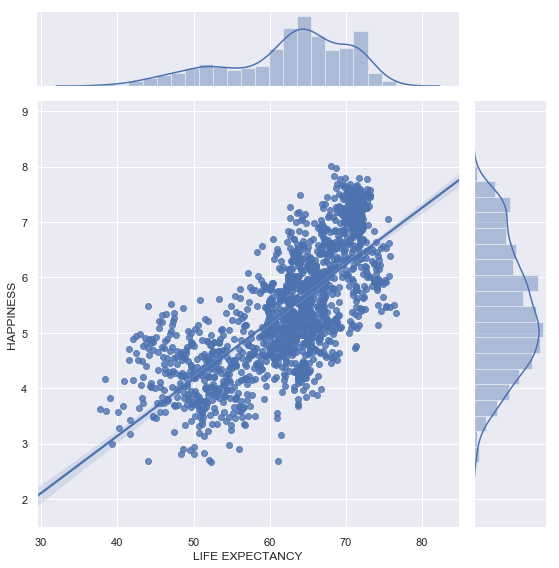

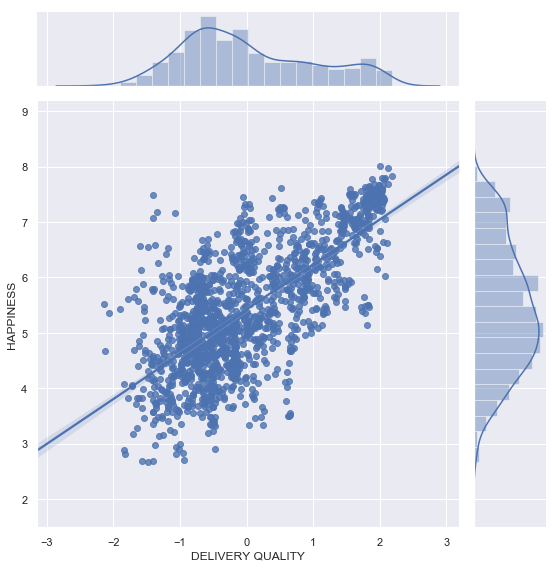

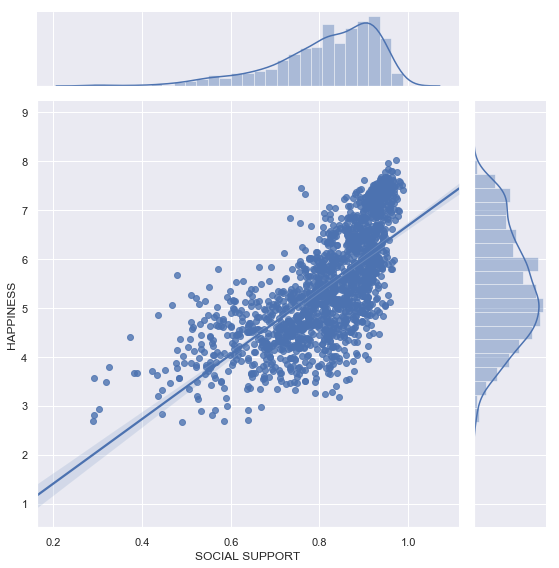

In [38]:
sb.jointplot(dataset['LOG GDP PER CAPITA'], dataset['HAPPINESS'], height = 8, kind='reg')
sb.jointplot(dataset['LIFE EXPECTANCY'], dataset['HAPPINESS'], height = 8, kind='reg')
sb.jointplot(dataset['DELIVERY QUALITY'], dataset['HAPPINESS'], height = 8, kind='reg')
sb.jointplot(dataset['SOCIAL SUPPORT'], dataset['HAPPINESS'], height = 8, kind='reg')

# Region-specific Data (in the year of 2017)
### Question:
- Should we use 2017's data or all the data?
### Purpose:
- We use the data of 2017 to investigate and compare each region's data distribution

In [39]:
# REGION in the Dataset
print("Number of Regions:", len(dataset['REGION'].unique()))
# Countries in each Region
print(dataset['REGION'].value_counts())

Number of Regions: 10
Sub-Saharan Africa                    327
Latin America and Caribbean           236
Western Europe                        211
Middle East and North Africa          181
Central and Eastern Europe            176
Commonwealth of Independent States    139
Southeast Asia                         93
South Asia                             72
East Asia                              65
North America and ANZ                  45
Name: REGION, dtype: int64


In [40]:
regionList = list(dataset['REGION'].unique()) # a list of all regions
featureList = list(dataset.columns[2:-1])       # a list of all variables, exluding 'COUNTRY', 'YEAR' and 'REGION'

In [41]:
print(regionList,'\n', featureList)

['South Asia', 'Central and Eastern Europe', 'Middle East and North Africa', 'Sub-Saharan Africa', 'Latin America and Caribbean', 'Commonwealth of Independent States', 'North America and ANZ', 'Western Europe', 'Southeast Asia', 'East Asia'] 
 ['HAPPINESS', 'LOG GDP PER CAPITA', 'SOCIAL SUPPORT', 'LIFE EXPECTANCY', 'FREEDOM', 'GENEROSITY', 'PERCEPTIONS OF CORRUPTION', 'POSITIVE AFFECT', 'NEGATIVE AFFECT', 'CONFIDENCE IN NATIONAL GOVERNMENT', 'DEMOCRATIC QUALITY', 'DELIVERY QUALITY', 'GINI']


In [42]:
df2017 = dataset[dataset['YEAR']==2017]
df2017.sample(n=10)

,COUNTRY,YEAR,HAPPINESS,LOG GDP PER CAPITA,SOCIAL SUPPORT,LIFE EXPECTANCY,FREEDOM,GENEROSITY,PERCEPTIONS OF CORRUPTION,POSITIVE AFFECT,NEGATIVE AFFECT,CONFIDENCE IN NATIONAL GOVERNMENT,DEMOCRATIC QUALITY,DELIVERY QUALITY,GINI,REGION
851,Malawi,2017,3.416863,7.002703,0.555423,54.234642,0.847921,0.021560,0.734637,0.608667,0.312088,0.620333,-0.072195,-0.512654,0.574056,Sub-Saharan Africa
532,Guatemala,2017,6.325119,8.918908,0.826492,63.381977,0.914522,-0.061729,0.799748,0.845866,0.308086,0.458624,-0.500178,-0.639285,0.495319,Latin America and Caribbean
1067,Palestinian Territories,2017,4.628133,8.368802,0.824345,63.072498,0.631611,-0.125693,0.830646,0.596766,0.416072,0.414401,-0.885068,-0.181237,0.478865,Middle East and North Africa
1347,Taiwan Province of China,2017,6.359451,10.461757,0.891119,71.209999,0.759655,-0.021688,0.742780,0.837277,0.114123,0.322822,0.852374,1.034032,0.381672,East Asia
1079,Panama,2017,6.567659,10.002714,0.911905,68.045410,0.899574,-0.164080,0.840777,0.832689,0.242319,0.390996,0.289805,0.037038,0.474343,Latin America and Caribbean
353,Cyprus,2017,6.062051,10.361367,0.818671,72.762794,0.811671,0.036287,0.851206,0.784188,0.300517,0.312653,0.788634,1.141808,0.410138,Western Europe
1293,Spain,2017,6.230173,10.445223,0.903158,74.498215,0.755561,-0.042156,0.791269,0.625056,0.302388,0.269586,0.532198,1.053474,0.378950,Western Europe
466,France,2017,6.635222,10.560774,0.931495,72.588936,0.833890,-0.133585,0.601486,0.762098,0.241984,0.374794,0.833815,1.379458,0.372855,Western Europe
947,Morocco,2017,5.312483,8.915044,0.641193,65.338860,0.814258,-0.227919,0.840502,0.559288,0.322716,0.454724,-0.529455,-0.174538,0.527967,Middle East and North Africa
1436,Uganda,2017,4.000517,7.442951,0.739956,51.763477,0.772344,0.071720,0.815770,0.703376,0.400026,0.655109,-0.726596,-0.514487,0.640637,Sub-Saharan Africa


In [43]:
df2017.describe()

,HAPPINESS,LOG GDP PER CAPITA,SOCIAL SUPPORT,LIFE EXPECTANCY,FREEDOM,GENEROSITY,PERCEPTIONS OF CORRUPTION,POSITIVE AFFECT,NEGATIVE AFFECT,CONFIDENCE IN NATIONAL GOVERNMENT,DEMOCRATIC QUALITY,DELIVERY QUALITY,GINI
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,5.485542,9.302592,0.806152,63.401468,0.779343,-0.011447,0.731436,0.700161,0.290964,0.505419,-0.113786,0.001055,0.458481
std,1.120553,1.193852,0.120553,7.582951,0.127649,0.157201,0.180442,0.107631,0.091693,0.196955,0.881569,0.984898,0.109690
min,2.661718,6.625341,0.319589,44.386528,0.427011,-0.296735,0.161791,0.420962,0.114123,0.110937,-2.053987,-1.826904,0.245601
25%,4.628133,8.404380,0.733540,57.980877,0.712657,-0.133585,0.673066,0.614217,0.214005,0.351550,-0.810456,-0.729995,0.377680
50%,5.578743,9.503636,0.828339,65.125687,0.812733,-0.033475,0.777749,0.710230,0.280323,0.502480,-0.246947,-0.202283,0.438771
75%,6.272941,10.285845,0.905436,69.051659,0.879128,0.089589,0.854000,0.788452,0.344226,0.622936,0.729626,0.716249,0.552189
max,7.788252,11.465231,0.966753,76.536362,0.985178,0.628706,0.956521,0.895255,0.599335,0.964690,1.479668,2.039114,0.852040


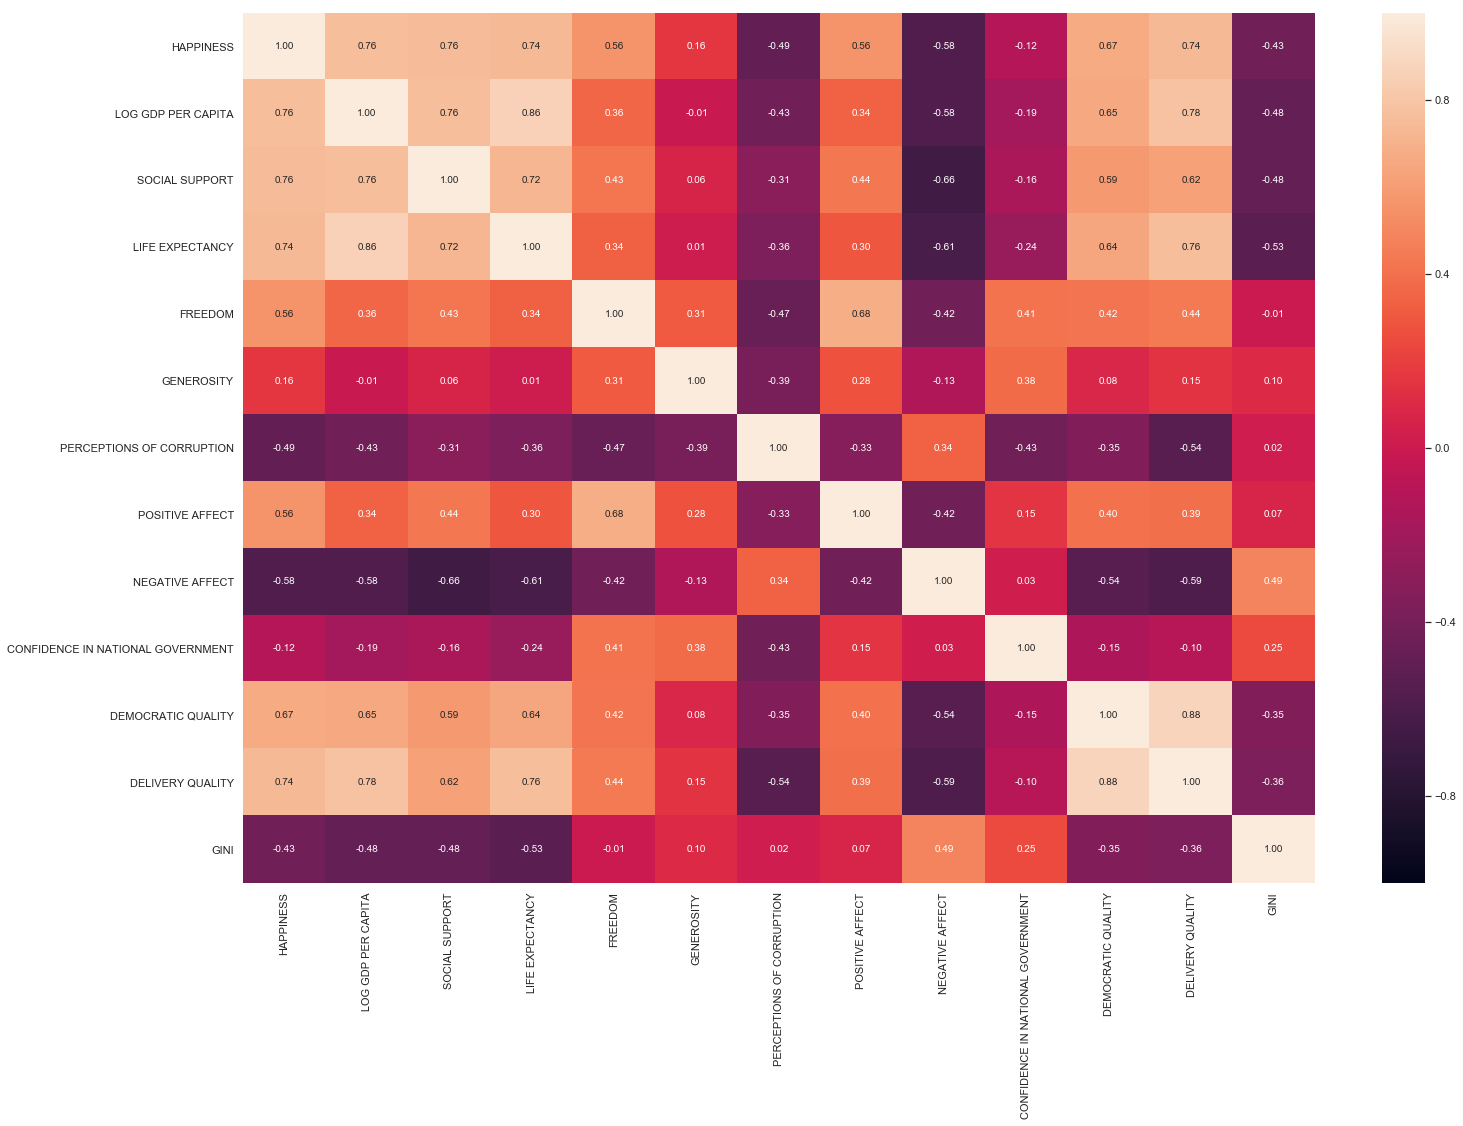

In [44]:
# Heatmap of the Correlation Matrix
f, axes = plt.subplots(1, 1, figsize=(24, 16))
sb.heatmap(df2017.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

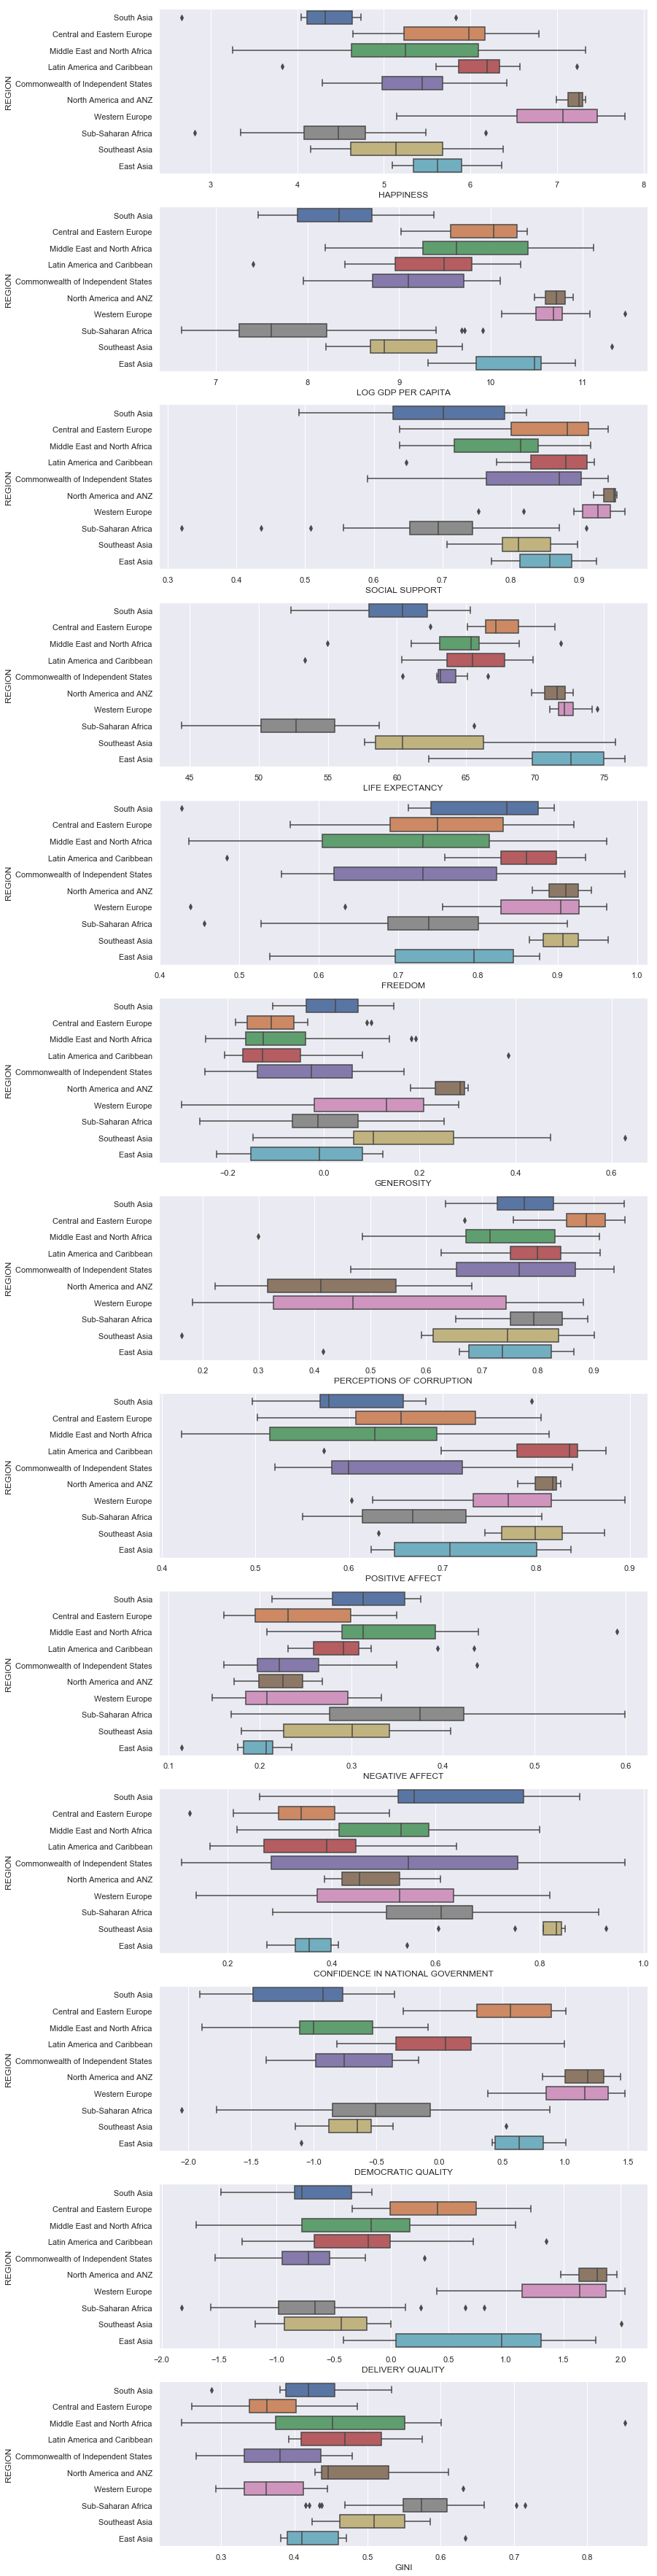

In [45]:
# data distribution of each region

f, axes = plt.subplots(len(featureList), 1, figsize=(12, 64))
count=0
for var in featureList:
    sb.boxplot(x = var, y = "REGION", data = df2017, orient = "h", ax=axes[count])
    count += 1

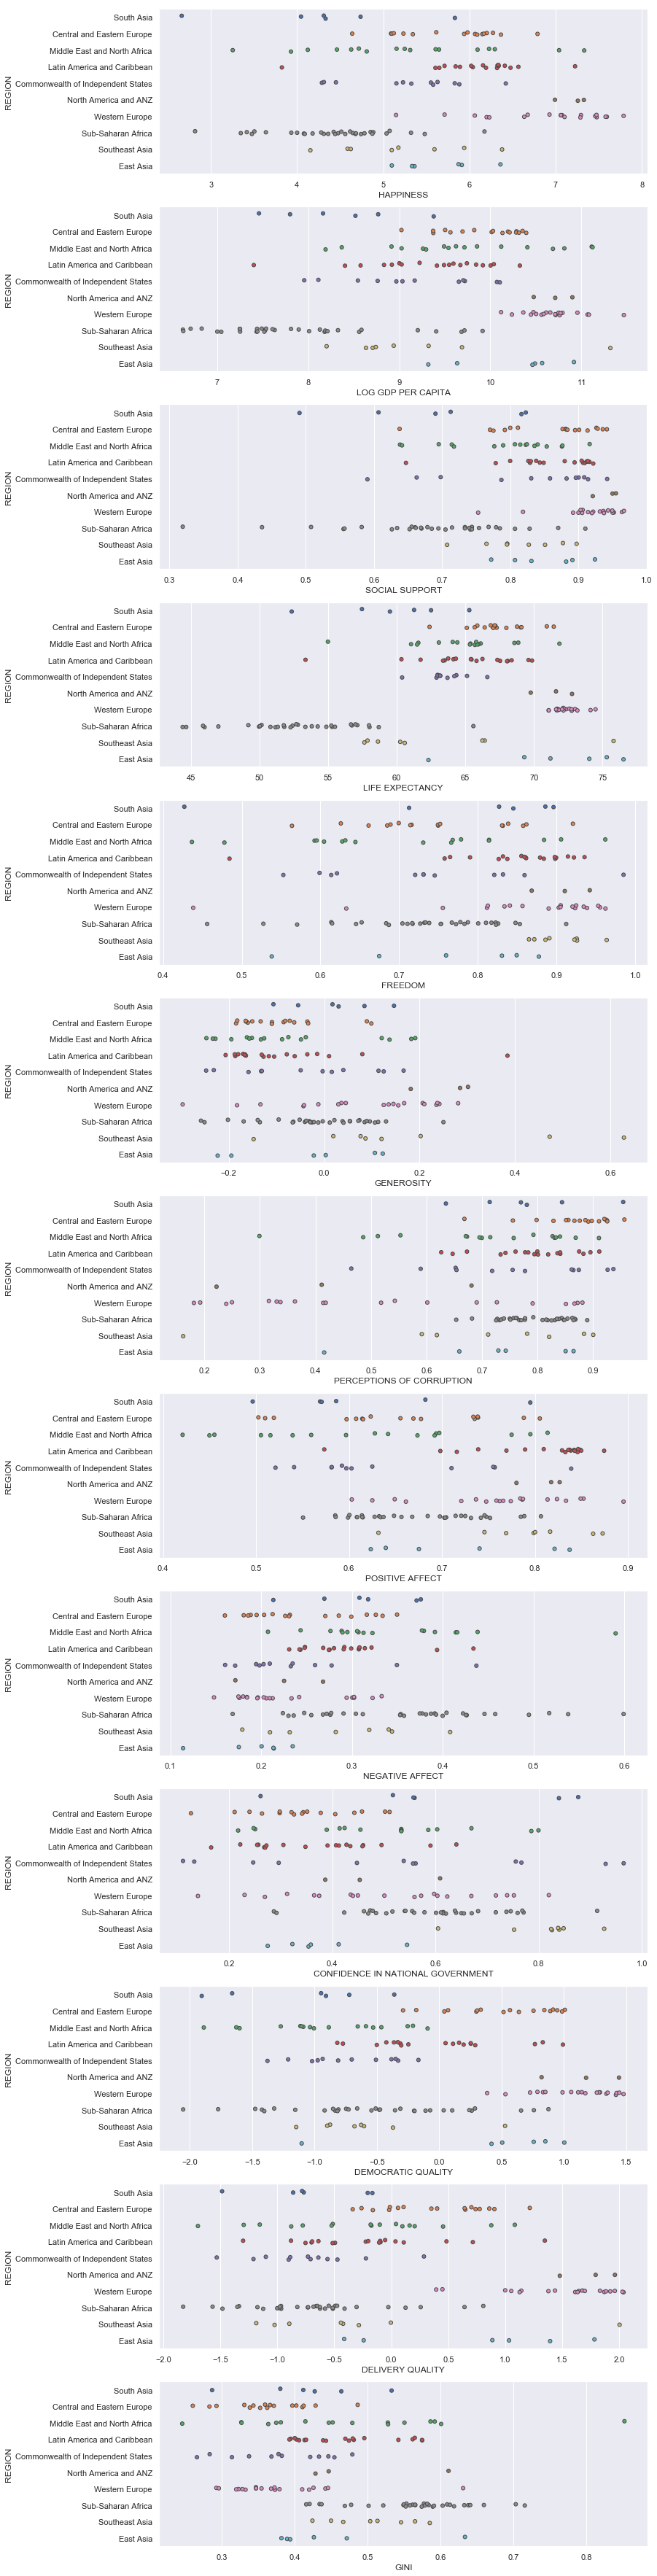

In [46]:

f, axes = plt.subplots(len(featureList), 1, figsize=(12, 64))
count=0
for var in featureList:
    sb.stripplot(y="REGION", x=var, data=df2017, jitter=True, linewidth=1, ax=axes[count])
    count += 1


### Observation:
- What's the pattern of the data?

### After study the pattern of data, we compare each region's data by their mean values

# Region-specific Data (Mean value over time)
### Question: Why choose Mean value instead of the latest year's data?
- Possible Answer: 
    - We can examine the overall "performance" of a region 
    - We assume that the data will not change greatly over a short period of time
    - Later we will examine the time series to prove or disprove our assumption

### Construct Seperate DF for each region

In [47]:
row = len(regionList)

seperateRegionDF = [] # store each DF in a list
                      # access DF by indexing

for R in regionList:
    DF = dataset[dataset["REGION"]==R]
    seperateRegionDF.append(DF)

seperateRegionDF[0].head()  # access DF by indexing

,COUNTRY,YEAR,HAPPINESS,LOG GDP PER CAPITA,SOCIAL SUPPORT,LIFE EXPECTANCY,FREEDOM,GENEROSITY,PERCEPTIONS OF CORRUPTION,POSITIVE AFFECT,NEGATIVE AFFECT,CONFIDENCE IN NATIONAL GOVERNMENT,DEMOCRATIC QUALITY,DELIVERY QUALITY,GINI,REGION
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,0.385668,South Asia
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,0.441906,South Asia
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,0.327318,South Asia
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,0.336764,South Asia
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,0.344540,South Asia


In [48]:
regionalMeanOfAllVar = [] # store mean value of all var for all regions
                          # each region's data is stored in a list
                          # access each region's data by indexing
for i in range(len(seperateRegionDF)):
    varMean = []
    for var in featureList:
        varMean.append(round(seperateRegionDF[i][var].mean(), 2))
    regionalMeanOfAllVar.append(varMean)

len(regionalMeanOfAllVar)

10

### Construct a 'mean_df'

In [49]:
# convert the list into DataFrame
mean_df = pd.DataFrame(regionalMeanOfAllVar, columns = featureList, index=regionList)
world_mean = []
for var in featureList:
    world_mean.append(round(mean_df[var].mean(), 2))
mean_df.loc["World Mean"] = world_mean

mean_df

,HAPPINESS,LOG GDP PER CAPITA,SOCIAL SUPPORT,LIFE EXPECTANCY,FREEDOM,GENEROSITY,PERCEPTIONS OF CORRUPTION,POSITIVE AFFECT,NEGATIVE AFFECT,CONFIDENCE IN NATIONAL GOVERNMENT,DEMOCRATIC QUALITY,DELIVERY QUALITY,GINI
South Asia,4.61,8.19,0.66,58.51,0.67,0.09,0.81,0.67,0.27,0.59,-1.00,-0.66,0.42
Central and Eastern Europe,5.40,9.80,0.85,66.18,0.64,-0.10,0.89,0.63,0.27,0.30,0.52,0.40,0.37
Middle East and North Africa,5.42,9.72,0.79,64.09,0.67,-0.06,0.70,0.63,0.34,0.53,-0.89,-0.18,0.42
Sub-Saharan Africa,4.23,7.77,0.71,50.25,0.69,-0.01,0.79,0.68,0.26,0.55,-0.56,-0.68,0.55
Latin America and Caribbean,6.02,9.21,0.85,64.07,0.77,-0.02,0.79,0.81,0.28,0.40,-0.08,-0.30,0.45
Commonwealth of Independent States,5.13,9.00,0.82,62.28,0.68,-0.12,0.78,0.62,0.22,0.54,-0.72,-0.70,0.36
North America and ANZ,7.30,10.64,0.94,71.00,0.90,0.25,0.45,0.84,0.23,0.51,1.17,1.75,0.56
Western Europe,6.80,10.62,0.92,71.36,0.84,0.09,0.58,0.77,0.24,0.46,1.07,1.47,0.40
Southeast Asia,5.34,9.13,0.81,62.61,0.85,0.21,0.73,0.79,0.25,0.76,-0.49,-0.11,0.48
East Asia,5.58,10.07,0.85,70.40,0.75,-0.03,0.73,0.74,0.18,0.35,0.38,0.72,0.43


In [50]:
import plotly.plotly as py
import plotly.graph_objs as go 

from datetime import datetime
import pandas as pd

data = []
for year in range(2011, 2018):

    trace = go.Choropleth(
    locations = dataset[dataset['YEAR']==year]['COUNTRY'],
    locationmode = 'country names',
    z = dataset[dataset['YEAR']==year]['HAPPINESS'],
    text = dataset[dataset['YEAR']==year]['COUNTRY'],
    colorscale = [
        [0, "rgb(255, 0, 0)"],
        [1, "rgb(255, 255, 0)"]
    ],
        
    autocolorscale = False,
    reversescale = True,
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(180,180,180)',
            width = 0.5
        )),
    colorbar = go.choropleth.ColorBar(
        title = 'Score'),
    )
    
    
    data.append(trace)
    



updatemenus = list([
    dict(active=0,
         buttons=list([   
            dict(label = "Year 2011",
                 method = 'update',
                 args = [{'visible': [True, False, False, False, False, False, False]},
                        ]),
            dict(label = "Year 2012",
                 method = 'update',
                 args = [{'visible': [False, True, False, False, False, False, False]},
                        ]),
            dict(label = "Year 2013",
                 method = 'update',
                 args = [{'visible': [False, False, True, False, False, False, False]},
                        ]),
            dict(label = "Year 2014",
                 method = 'update',
                 args = [{'visible': [False, False, False, True, False, False, False]},
                        ]),
            dict(label = "Year 2015",
                 method = 'update',
                 args = [{'visible': [False, False, False, False, True, False, False]},
                        ]),
            dict(label = "Year 2016",
                 method = 'update',
                 args = [{'visible': [False, False, False, False, False, True, False]},
                        ]),
            dict(label = "Year 2017",
                 method = 'update',
                 args = [{'visible': [False, False, False, False, False, False, True]},
                        ])
            
        ]),
         
        direction = 'down',
        pad = {'r': 10, 't': 10},
        showactive = True,
        x = 0,
        # xanchor = 'left',
        y = 0.93,
        yanchor = 'top' 
    )
])



layout = dict(
                showlegend=True,
                updatemenus=updatemenus, 
                barmode='group',
                bargap=0.15,
                bargroupgap=0.1)

fig = dict(data=data, layout=layout)
fig['layout'].update(title='World Happiness')
iplot(fig)

In [51]:
import plotly.plotly as py
import plotly.graph_objs as go 

from datetime import datetime
import pandas as pd

var = featureList[1]

data = []
for year in range(2011, 2018):

    trace = go.Choropleth(
    locations = dataset[dataset['YEAR']==year]['COUNTRY'],
    locationmode = 'country names',
    z = dataset[dataset['YEAR']==year][var],
    text = dataset[dataset['YEAR']==year]['COUNTRY'],
    colorscale = [
        [0, "rgb(255, 0, 0)"],
        [1, "rgb(0, 0, 100)"]
    ],
        
    autocolorscale = False,
    reversescale = True,
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(180,180,180)',
            width = 0.5
        )),
    colorbar = go.choropleth.ColorBar(
        title = "Score"),
    )
    
    
    data.append(trace)
    



updatemenus = list([
    dict(active=0,
         buttons=list([   
            dict(label = "Year 2011",
                 method = 'update',
                 args = [{'visible': [True, False, False, False, False, False, False]},
                        ]),
            dict(label = "Year 2012",
                 method = 'update',
                 args = [{'visible': [False, True, False, False, False, False, False]},
                        ]),
            dict(label = "Year 2013",
                 method = 'update',
                 args = [{'visible': [False, False, True, False, False, False, False]},
                        ]),
            dict(label = "Year 2014",
                 method = 'update',
                 args = [{'visible': [False, False, False, True, False, False, False]},
                        ]),
            dict(label = "Year 2015",
                 method = 'update',
                 args = [{'visible': [False, False, False, False, True, False, False]},
                        ]),
            dict(label = "Year 2016",
                 method = 'update',
                 args = [{'visible': [False, False, False, False, False, True, False]},
                        ]),
            dict(label = "Year 2017",
                 method = 'update',
                 args = [{'visible': [False, False, False, False, False, False, True]},
                        ])
            
        ]),
         
        direction = 'down',
        pad = {'r': 10, 't': 10},
        showactive = True,
        x = 0,
        # xanchor = 'left',
        y = 0.93,
        yanchor = 'top' 
    )
])



layout = dict(
                showlegend=True,
                updatemenus=updatemenus, 
                barmode='group',
                bargap=0.15,
                bargroupgap=0.1)

fig = dict(data=data, layout=layout)
fig['layout'].update(title=var)
iplot(fig)

In [52]:
import plotly.plotly as py
import plotly.graph_objs as go 

from datetime import datetime
import pandas as pd

var = featureList[2]

data = []
for year in range(2011, 2018):

    trace = go.Choropleth(
    locations = dataset[dataset['YEAR']==year]['COUNTRY'],
    locationmode = 'country names',
    z = dataset[dataset['YEAR']==year][var],
    text = dataset[dataset['YEAR']==year]['COUNTRY'],
    colorscale = [
        [0, "rgb(255, 0, 0)"],
        [1, "rgb(0, 0, 100)"]
    ],
        
    autocolorscale = False,
    reversescale = True,
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(180,180,180)',
            width = 0.5
        )),
    colorbar = go.choropleth.ColorBar(
        title = "Score"),
    )
    
    
    data.append(trace)
    



updatemenus = list([
    dict(active=0,
         buttons=list([   
            dict(label = "Year 2011",
                 method = 'update',
                 args = [{'visible': [True, False, False, False, False, False, False]},
                        ]),
            dict(label = "Year 2012",
                 method = 'update',
                 args = [{'visible': [False, True, False, False, False, False, False]},
                        ]),
            dict(label = "Year 2013",
                 method = 'update',
                 args = [{'visible': [False, False, True, False, False, False, False]},
                        ]),
            dict(label = "Year 2014",
                 method = 'update',
                 args = [{'visible': [False, False, False, True, False, False, False]},
                        ]),
            dict(label = "Year 2015",
                 method = 'update',
                 args = [{'visible': [False, False, False, False, True, False, False]},
                        ]),
            dict(label = "Year 2016",
                 method = 'update',
                 args = [{'visible': [False, False, False, False, False, True, False]},
                        ]),
            dict(label = "Year 2017",
                 method = 'update',
                 args = [{'visible': [False, False, False, False, False, False, True]},
                        ])
            
        ]),
         
        direction = 'down',
        pad = {'r': 10, 't': 10},
        showactive = True,
        x = 0,
        # xanchor = 'left',
        y = 0.93,
        yanchor = 'top' 
    )
])



layout = dict(
                showlegend=True,
                updatemenus=updatemenus, 
                barmode='group',
                bargap=0.15,
                bargroupgap=0.1)

fig = dict(data=data, layout=layout)
fig['layout'].update(title=var)
iplot(fig)

In [53]:
import plotly.plotly as py
import plotly.graph_objs as go 

from datetime import datetime
import pandas as pd

var = featureList[3]

data = []
for year in range(2011, 2018):

    trace = go.Choropleth(
    locations = dataset[dataset['YEAR']==year]['COUNTRY'],
    locationmode = 'country names',
    z = dataset[dataset['YEAR']==year][var],
    text = dataset[dataset['YEAR']==year]['COUNTRY'],
    colorscale = [
        [0, "rgb(255, 0, 0)"],
        [1, "rgb(0, 0, 100)"]
    ],
        
    autocolorscale = False,
    reversescale = True,
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(180,180,180)',
            width = 0.5
        )),
    colorbar = go.choropleth.ColorBar(
        title = "Score"),
    )
    
    
    data.append(trace)
    



updatemenus = list([
    dict(active=0,
         buttons=list([   
            dict(label = "Year 2011",
                 method = 'update',
                 args = [{'visible': [True, False, False, False, False, False, False]},
                        ]),
            dict(label = "Year 2012",
                 method = 'update',
                 args = [{'visible': [False, True, False, False, False, False, False]},
                        ]),
            dict(label = "Year 2013",
                 method = 'update',
                 args = [{'visible': [False, False, True, False, False, False, False]},
                        ]),
            dict(label = "Year 2014",
                 method = 'update',
                 args = [{'visible': [False, False, False, True, False, False, False]},
                        ]),
            dict(label = "Year 2015",
                 method = 'update',
                 args = [{'visible': [False, False, False, False, True, False, False]},
                        ]),
            dict(label = "Year 2016",
                 method = 'update',
                 args = [{'visible': [False, False, False, False, False, True, False]},
                        ]),
            dict(label = "Year 2017",
                 method = 'update',
                 args = [{'visible': [False, False, False, False, False, False, True]},
                        ])
            
        ]),
         
        direction = 'down',
        pad = {'r': 10, 't': 10},
        showactive = True,
        x = 0,
        # xanchor = 'left',
        y = 0.93,
        yanchor = 'top' 
    )
])



layout = dict(
                showlegend=True,
                updatemenus=updatemenus, 
                barmode='group',
                bargap=0.15,
                bargroupgap=0.1)

fig = dict(data=data, layout=layout)
fig['layout'].update(title=var)
iplot(fig)

In [54]:
import plotly.plotly as py
import plotly.graph_objs as go 

from datetime import datetime
import pandas as pd

data = []
for i in range(len(featureList)):
    r = 100 * ((i%2)+1)
    g = 50 * ((i%4)+1)
    b = 30 * ((i%7)+1)
    co = 'rgb' + '(' + str(r) + ',' + str(g) + ',' + str(b) + ')'
    
    trace1 = go.Bar(
        x=regionList,
        y=mean_df[featureList[i]],
        name=featureList[i],
        marker=dict(color=co)
    )
    data.append(trace1)
    
    mean = []
    for j in range(len(regionList)):
        mean.append(mean_df.loc['World Mean'][featureList[i]])
        
    trace2 = go.Scatter(
        x=regionList,
        y=mean,
        name='World Average'
    )
    data.append(trace2)
    
    


updatemenus = list([
    dict(active=0,
         buttons=list([   
            dict(label = 'Select Feature',
                 method = 'update',
                 args = [{'visible': [False, False, False, False, False, False, False, False, False, False, 
                                      False, False, False, False, False, False, False, False, False, False,
                                      False, False, False, False, False, False]},
                        ]),
            dict(label = featureList[0],
                 method = 'update',
                 args = [{'visible': [True, True, False, False, False, False, False, False, False, False, 
                                      False, False, False, False, False, False, False, False, False, False,
                                      False, False, False, False, False, False]},
                        ]),
            dict(label = featureList[1],
                 method = 'update',
                 args = [{'visible': [False, False, True, True, False, False, False, False, False, False, 
                                      False, False, False, False, False, False, False, False, False, False, 
                                      False, False, False, False, False, False]},
                        ]),
            dict(label = featureList[2],
                 method = 'update',
                 args = [{'visible': [False, False, False, False, True, True, False, False, False, False, 
                                      False, False, False, False, False, False, False, False, False, False, 
                                      False, False, False, False, False, False]},
                        ]),
            dict(label = featureList[3],
                 method = 'update',
                 args = [{'visible': [False, False, False, False, False, False, True, True, False, False, 
                                      False, False, False, False, False, False, False, False, False, False, 
                                      False, False, False, False, False, False]},
                        ]),
            dict(label = featureList[4],
                 method = 'update',
                 args = [{'visible': [False, False, False, False, False, False, False, False, True, True, 
                                      False, False, False, False, False, False, False, False, False, False, 
                                      False, False, False, False, False, False]},
                        ]),
            dict(label = featureList[5],
                 method = 'update',
                 args = [{'visible': [False, False, False, False, False, False, False, False, False, False,
                                      True, True, False, False, False, False, False, False, False, False, 
                                      False, False, False, False, False, False]},
                        ]),
            dict(label = featureList[6],
                 method = 'update',
                 args = [{'visible': [False, False, False, False, False, False, False, False, False, False,
                                      False, False, True, True, False, False, False, False, False, False,
                                      False, False, False, False, False, False]},
                        ]),
            dict(label = featureList[7],
                 method = 'update',
                 args = [{'visible': [False, False, False, False, False, False, False, False, False, False,
                                      False, False, False, False, True, True, False, False, False, False,
                                      False, False, False, False, False, False]},
                        ]),
            dict(label = featureList[8],
                 method = 'update',
                 args = [{'visible': [False, False, False, False, False, False, False, False, False, False,
                                      False, False, False, False, False, False, True, True, False, False, 
                                      False, False, False, False, False, False]},
                        ]),
            dict(label = featureList[9],
                 method = 'update',
                 args = [{'visible': [False, False, False, False, False, False, False, False, False, False,
                                      False, False, False, False, False, False, False, False, 
                                      True, True, False, False, False, False, False, False]},
                        ]),
            dict(label = featureList[10],
                 method = 'update',
                 args = [{'visible': [False, False, False, False, False, False, False, False, False, False,
                                      False, False, False, False, False, False, False, False, 
                                      False, False, True, True, False, False, False, False]},
                        ]),
            dict(label = featureList[11],
                 method = 'update',
                 args = [{'visible': [False, False, False, False, False, False, False, False, False, False,
                                      False, False, False, False, False, False, False, False,
                                      False, False, False, False, True, True, False, False]},
                        ]),
            dict(label = featureList[12],
                 method = 'update',
                 args = [{'visible': [False, False, False, False, False, False, False, False, False, False,
                                      False, False, False, False, False, False, False, False, False, False,
                                      False, False, False, False, True, True]},
                        ])
            
        ]),
        direction = 'down',
        pad = {'r': 10, 't': 10},
        showactive = True,
        x = 0.35,
        # xanchor = 'left',
        y = 1.25,
        yanchor = 'top' 
    )
])



layout = dict(
                showlegend=True,
                updatemenus=updatemenus, 
                barmode='group',
                bargap=0.15,
                bargroupgap=0.1)

fig = dict(data=data, layout=layout)
iplot(fig)

### Observation:
- By looking at the above plot, we can clearly see the difference between each region

In [55]:
percentage_df = mean_df.copy()
for R in regionList:
    percentage_df.loc[R] = (percentage_df.loc[R] - mean_df.loc["World Mean"])/abs(mean_df.loc["World Mean"]) * 100
percentage_df = percentage_df.round(2)
percentage_df.head()

,HAPPINESS,LOG GDP PER CAPITA,SOCIAL SUPPORT,LIFE EXPECTANCY,FREEDOM,GENEROSITY,PERCEPTIONS OF CORRUPTION,POSITIVE AFFECT,NEGATIVE AFFECT,CONFIDENCE IN NATIONAL GOVERNMENT,DEMOCRATIC QUALITY,DELIVERY QUALITY,GINI
South Asia,-17.38,-13.06,-19.51,-8.69,-10.67,200.00,10.96,-6.94,8.0,18.0,-1566.67,-488.24,-4.55
Central and Eastern Europe,-3.23,4.03,3.66,3.28,-14.67,-433.33,21.92,-12.50,8.0,-40.0,966.67,135.29,-15.91
Middle East and North Africa,-2.87,3.18,-3.66,0.02,-10.67,-300.00,-4.11,-12.50,36.0,6.0,-1383.33,-205.88,-4.55
Sub-Saharan Africa,-24.19,-17.52,-13.41,-21.58,-8.00,-133.33,8.22,-5.56,4.0,10.0,-833.33,-500.00,25.00
Latin America and Caribbean,7.89,-2.23,3.66,-0.02,2.67,-166.67,8.22,12.50,12.0,-20.0,-33.33,-276.47,2.27


In [56]:
percentage_df.columns

Index(['HAPPINESS', 'LOG GDP PER CAPITA', 'SOCIAL SUPPORT', 'LIFE EXPECTANCY',
       'FREEDOM', 'GENEROSITY', 'PERCEPTIONS OF CORRUPTION', 'POSITIVE AFFECT',
       'NEGATIVE AFFECT', 'CONFIDENCE IN NATIONAL GOVERNMENT',
       'DEMOCRATIC QUALITY', 'DELIVERY QUALITY', 'GINI'],
      dtype='object')

In [57]:
plotted_var = ['HAPPINESS', 'LOG GDP PER CAPITA', 'SOCIAL SUPPORT', 'LIFE EXPECTANCY',
       'FREEDOM', 'PERCEPTIONS OF CORRUPTION', 'POSITIVE AFFECT',
       'NEGATIVE AFFECT', 'CONFIDENCE IN NATIONAL GOVERNMENT','GINI']
data = []
i = 0 
for R in regionList:
    
    r =g = b = 50*i
    co = 'rgba' + '(' + str(r) + ',' + str(g) + ',' + str(b) + ')'
    i += 1
    
    trace = go.Bar(
        x=regionList,
        y=percentage_df.loc[R][plotted_var],
        name=R,
        marker=dict(
            color=co
        )
    )
    
    data.append(trace)


layout = go.Layout(
    title="Regional Data (Comparing with World Average)",
    xaxis=dict(
        tickfont=dict(
            size=10,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title="Percentage",
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    legend=dict(

        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1
)

fig = go.Figure(data=data, layout=layout)
fig['layout'].update(height=800, width=1000)
iplot(fig)

In [58]:
percentage_df.loc['South Asia']

HAPPINESS                             -17.38
LOG GDP PER CAPITA                    -13.06
SOCIAL SUPPORT                        -19.51
LIFE EXPECTANCY                        -8.69
FREEDOM                               -10.67
GENEROSITY                            200.00
PERCEPTIONS OF CORRUPTION              10.96
POSITIVE AFFECT                        -6.94
NEGATIVE AFFECT                         8.00
CONFIDENCE IN NATIONAL GOVERNMENT      18.00
DEMOCRATIC QUALITY                  -1566.67
DELIVERY QUALITY                     -488.24
GINI                                   -4.55
Name: South Asia, dtype: float64

In [82]:
import plotly.plotly as py
import plotly.graph_objs as go

data = []
for R in regionList:
    
    trace = go.Scatterpolar(
      r = percentage_df.loc[R][plotted_var],
      theta = plotted_var,
      fill = 'toself',
      name = R)
    data.append(trace)

layout = go.Layout(
  polar = dict(
    radialaxis = dict(
      visible = True,
      range = [-30, 30]
    )
  ),
  showlegend = True, legend=dict(x=1, y=1.2)
)

fig = go.Figure(data=data, layout=layout)

fig['layout'].update(title='Performace', height=500, width=1000)
iplot(fig, filename = "radar/multiple")

### Time Series

In [60]:
DataOverYears = [] # store each year's data of a region

# structure: DataOverYears:[ regionDataOverYears:[ eachYear'sData: [] ] ]

for i in range(len(regionList)):
    regionDataOverYears = []
    regionDF = seperateRegionDF[i]
    for year in range(2011, 2018):
        DF = regionDF[regionDF["YEAR"]==year]
        regionDataOverYears.append(list(round(DF.mean(), 2)))
    DataOverYears.append(regionDataOverYears)

    
YearDF = []
count = 0
for R in regionList:

    dataOverYears = pd.DataFrame(DataOverYears[count], columns = featureList, index=range(2011, 2018))
    dataOverYears["REGION"]=R
    result = YearDF.append(dataOverYears)
    
    count += 1

    
TimeSeries_df = pd.concat(YearDF)
TimeSeries_df.head()

,HAPPINESS,LOG GDP PER CAPITA,SOCIAL SUPPORT,LIFE EXPECTANCY,FREEDOM,GENEROSITY,PERCEPTIONS OF CORRUPTION,POSITIVE AFFECT,NEGATIVE AFFECT,CONFIDENCE IN NATIONAL GOVERNMENT,DEMOCRATIC QUALITY,DELIVERY QUALITY,GINI,REGION
2011,4.45,8.14,0.63,58.16,0.65,0.04,0.82,0.68,0.25,0.52,-1.10,-0.76,0.40,South Asia
2012,4.47,8.19,0.62,58.45,0.60,0.11,0.82,0.72,0.25,0.52,-1.10,-0.74,0.40,South Asia
2013,4.62,8.31,0.65,58.89,0.70,0.14,0.82,0.68,0.26,0.60,-0.87,-0.61,0.37,South Asia
2014,4.54,8.34,0.68,59.16,0.72,0.12,0.78,0.68,0.28,0.66,-0.70,-0.55,0.43,South Asia
2015,4.61,8.38,0.68,59.42,0.72,0.13,0.77,0.67,0.30,0.62,-0.70,-0.51,0.44,South Asia


In [61]:
# calculate world average change over years

world_av = []
for year in range(2011, 2018):
    world_av.append(round(TimeSeries_df.loc[year].mean(), 2))

avTimeSeries_df = pd.DataFrame(world_av, columns = featureList, index=range(2011, 2018))
avTimeSeries_df.head()

,HAPPINESS,LOG GDP PER CAPITA,SOCIAL SUPPORT,LIFE EXPECTANCY,FREEDOM,GENEROSITY,PERCEPTIONS OF CORRUPTION,POSITIVE AFFECT,NEGATIVE AFFECT,CONFIDENCE IN NATIONAL GOVERNMENT,DEMOCRATIC QUALITY,DELIVERY QUALITY,GINI
2011,5.61,9.41,0.82,63.96,0.75,0.02,0.72,0.72,0.24,0.50,-0.06,0.16,0.44
2012,5.54,9.40,0.81,64.02,0.73,0.03,0.73,0.72,0.25,0.49,-0.09,0.12,0.44
2013,5.56,9.44,0.81,64.35,0.74,0.03,0.74,0.72,0.26,0.48,-0.05,0.15,0.42
2014,5.60,9.49,0.82,64.73,0.76,0.05,0.71,0.72,0.26,0.50,-0.01,0.21,0.45
2015,5.58,9.48,0.82,64.76,0.76,0.05,0.71,0.72,0.27,0.50,-0.04,0.18,0.44


In [62]:
var = featureList[0]
data = []


for i in range(len(regionList)):
    R = regionList[i]
    score = TimeSeries_df[TimeSeries_df["REGION"]==R][var]
    trace1 = go.Scatter(
                x=[2011, 2012, 2013, 2014, 2015, 2016, 2017],
                y=score, 
                name = R)
        
    data.append(trace1)
    
trace2 = go.Scatter(
                x=[2011, 2012, 2013, 2014, 2015, 2016, 2017],
                y=avTimeSeries_df[var], 
                name = "World Average",
                marker=dict(
                    color='rgb(0, 0, 0)'
                ))
data.append(trace2)


    
layout = dict(
    title = "Happiness Score Over Time",
    xaxis = dict(
        range = ['2011','2017'])
)

fig = go.Figure(data = data, layout=layout)
fig['layout'].update(height=550, width=800)
iplot(fig)

In [63]:
arrayData = np.array(DataOverYears)

for i in range(len(regionList)):
    for j in range(6, 0, -1):
        for k in range(len(featureList)):
            if (arrayData[i][j-1][k] == 0):
                arrayData[i][j-1][k] += 0.0001
        arrayData[i][j] = ((arrayData[i][j] - arrayData[i][j-1]) / arrayData[i][j-1])*100
    arrayData[i][0] = 0
        
        
PercentYearDF = []
count = 0
for R in regionList:

    dataOverYears = pd.DataFrame(arrayData[count], columns = featureList, index=range(2011, 2018))
    dataOverYears["REGION"]=R
    result = PercentYearDF.append(dataOverYears)
    
    count += 1
    
PercentageTS_df = pd.concat(PercentYearDF)
PercentageTS_df.head()

,HAPPINESS,LOG GDP PER CAPITA,SOCIAL SUPPORT,LIFE EXPECTANCY,FREEDOM,GENEROSITY,PERCEPTIONS OF CORRUPTION,POSITIVE AFFECT,NEGATIVE AFFECT,CONFIDENCE IN NATIONAL GOVERNMENT,DEMOCRATIC QUALITY,DELIVERY QUALITY,GINI,REGION
2011,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,South Asia
2012,0.449438,0.614251,-1.587302,0.498624,-7.692308,175.000000,0.000000,5.882353,0.000000,0.000000,-0.000000,-2.631579,0.000000,South Asia
2013,3.355705,1.465201,4.838710,0.752780,16.666667,27.272727,0.000000,-5.555556,4.000000,15.384615,-20.909091,-17.567568,-7.500000,South Asia
2014,-1.731602,0.361011,4.615385,0.458482,2.857143,-14.285714,-4.878049,0.000000,7.692308,10.000000,-19.540230,-9.836066,16.216216,South Asia
2015,1.541850,0.479616,0.000000,0.439486,0.000000,8.333333,-1.282051,-1.470588,7.142857,-6.060606,-0.000000,-7.272727,2.325581,South Asia


In [64]:
var = featureList[0]
data = []


for i in range(len(regionList)):
    R = regionList[i]
    score = PercentageTS_df[PercentageTS_df["REGION"]==R][var]
    trace1 = go.Scatter(
                x=[2011, 2012, 2013, 2014, 2015, 2016, 2017],
                y=score, 
                name = R)
    data.append(trace1)
    
   
    
    
layout = dict(
    title = "Happiness Score Over Time",
    xaxis = dict(
        range = ['2011','2017'])
)

fig = go.Figure(data = data)
fig['layout'].update(title = "Change in Happiness Over Time", height=600, width=1000)
iplot(fig)

### Question: What is the average growth rate of var?

# ------------------End of Data Visualization----------------------- #

# Classification

### Content
<a id='MachineLearning'></a>
- [Main Page](#mainPage)
- [Data Cleaning](#DataCleaning)
- [Data Exploration](#DataExploration)
- [Machine Learning](#MachineLearning)

In [65]:
import matplotlib.pyplot as plt
from torch.autograd import Variable
import torch.utils.data as data
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

In [66]:
classData = dataset[dataset.columns[2:]].copy()

### Data cleaning:
- We delete column 'COUNTRY' and 'YEAR' beacuse we are more interested in how these feature scores can be related to their regions

In [67]:
classData.sample()

,HAPPINESS,LOG GDP PER CAPITA,SOCIAL SUPPORT,LIFE EXPECTANCY,FREEDOM,GENEROSITY,PERCEPTIONS OF CORRUPTION,POSITIVE AFFECT,NEGATIVE AFFECT,CONFIDENCE IN NATIONAL GOVERNMENT,DEMOCRATIC QUALITY,DELIVERY QUALITY,GINI,REGION
662,5.839314,10.469585,0.869487,72.330711,0.570095,0.104592,0.908324,0.669761,0.387652,0.280695,0.712513,0.410039,0.369049,Western Europe


In [68]:
# map each region indicator to a number
regionMapping = {}
c = 0
for R in regionList:
    regionMapping[R]=c
    c += 1

regionMapping

{'South Asia': 0,
 'Central and Eastern Europe': 1,
 'Middle East and North Africa': 2,
 'Sub-Saharan Africa': 3,
 'Latin America and Caribbean': 4,
 'Commonwealth of Independent States': 5,
 'North America and ANZ': 6,
 'Western Europe': 7,
 'Southeast Asia': 8,
 'East Asia': 9}

In [69]:
classData['REGION'] = classData['REGION'].map(regionMapping).astype('category')
classData.info()
classData.sample()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1545 entries, 0 to 1561
Data columns (total 14 columns):
HAPPINESS                            1545 non-null float64
LOG GDP PER CAPITA                   1545 non-null float64
SOCIAL SUPPORT                       1545 non-null float64
LIFE EXPECTANCY                      1545 non-null float64
FREEDOM                              1545 non-null float64
GENEROSITY                           1545 non-null float64
PERCEPTIONS OF CORRUPTION            1545 non-null float64
POSITIVE AFFECT                      1545 non-null float64
NEGATIVE AFFECT                      1545 non-null float64
CONFIDENCE IN NATIONAL GOVERNMENT    1545 non-null float64
DEMOCRATIC QUALITY                   1545 non-null float64
DELIVERY QUALITY                     1545 non-null float64
GINI                                 1545 non-null float64
REGION                               1545 non-null category
dtypes: category(1), float64(13)
memory usage: 170.9 KB


,HAPPINESS,LOG GDP PER CAPITA,SOCIAL SUPPORT,LIFE EXPECTANCY,FREEDOM,GENEROSITY,PERCEPTIONS OF CORRUPTION,POSITIVE AFFECT,NEGATIVE AFFECT,CONFIDENCE IN NATIONAL GOVERNMENT,DEMOCRATIC QUALITY,DELIVERY QUALITY,GINI,REGION
1431,4.309238,7.38302,0.884722,50.095905,0.649463,0.094538,0.837546,0.753984,0.265322,0.396223,-0.681256,-0.536406,0.694142,3


### Data Normalisation and Splitting

In [70]:
x = classData[featureList].copy()
y = np.array(classData[["REGION"]].copy())
y = np.squeeze(y)
# scaling the data
# mean = 0, std = 1
scaler = StandardScaler()
x = scaler.fit_transform(x)

# test = 20% of total data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [71]:
print('shape of x: ', np.shape(x))
print('shape of y: ', np.shape(y))
print()
print('shape of x_train: ', np.shape(x_train))
print('shape of y_trian: ', np.shape(y_train))
print()
print('shape of x_test: ', np.shape(x_test))
print('shape of y_test: ', np.shape(y_test))

shape of x:  (1545, 13)
shape of y:  (1545,)

shape of x_train:  (1236, 13)
shape of y_trian:  (1236,)

shape of x_test:  (309, 13)
shape of y_test:  (309,)


In [72]:
pd.DataFrame(x).describe().round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,1545.00,1545.00,1545.00,1545.00,1545.00,1545.00,1545.00,1545.00,1545.00,1545.00,1545.00,1545.00,1545.00
mean,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.48,-2.41,-4.37,-3.09,-3.26,-1.98,-3.78,-3.21,-2.03,-2.17,-2.66,-2.21,-2.16
25%,-0.74,-0.76,-0.52,-0.60,-0.66,-0.70,-0.30,-0.81,-0.70,-0.75,-0.77,-0.74,-0.73
50%,-0.09,0.15,0.19,0.19,0.13,-0.13,0.29,0.07,-0.14,-0.07,-0.11,-0.21,-0.19
75%,0.75,0.83,0.78,0.74,0.80,0.58,0.68,0.85,0.57,0.63,0.92,0.72,0.62
max,2.30,2.15,1.48,1.79,1.76,4.16,1.25,2.18,5.26,2.60,1.90,2.22,4.96


### 1. Decision Tree

Train Accuracy 	: 0.9894822006472492
Test Accuracy 	: 0.8867313915857605


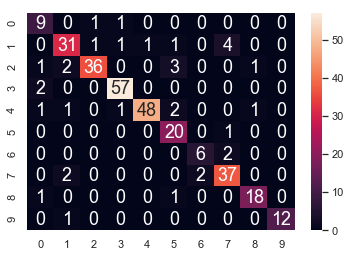

In [73]:
from sklearn.tree import DecisionTreeClassifier 
dectree = DecisionTreeClassifier(max_depth = 12).fit(x_train, y_train) 
pred = dectree.predict(x_test) 
  
print("Train Accuracy \t:", dectree.score(x_train, y_train))
print("Test Accuracy \t:", dectree.score(x_test, y_test))

sb.heatmap(confusion_matrix(y_test, pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [74]:
train_acc = []
test_acc = []
depth = np.array([i for i in range(1, 100)])

for D in depth:
    dectree = DecisionTreeClassifier(max_depth = D).fit(x_train, y_train) 
    train_acc.append(dectree.score(x_train, y_train))
    test_acc.append(dectree.score(x_test, y_test))
    

train_acc = np.array(train_acc)
test_acc = np.array(test_acc)

trace1 = go.Scatter(
                x=depth,
                y=train_acc, 
                name = 'Train Acc')
        
trace2 = go.Scatter(
                x=depth,
                y=test_acc, 
                name = 'Test Acc')
    
data = [trace1, trace2]

layout = dict(
    title = "Accuracy")


fig = go.Figure(data = data)
fig['layout'].update(title = "Accuracy")
iplot(fig)

### 2. Random Forest

train acc:  1.0
test acc:  0.9611650485436893


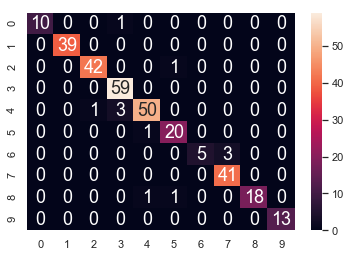

In [75]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=52, max_depth=10, random_state=5)
RF = rf.fit(x_train, y_train) 
pred = RF.predict(x_test) 

print ("train acc: ", RF.score(x_train, y_train) )
print ("test acc: ", RF.score(x_test, y_test) )

# creating a confusion matrix 
cm = confusion_matrix(y_test, pred) 
sb.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18})


In [76]:
train_acc = []
test_acc = []
depth = np.array([i for i in range(1, 50)])

for D in depth:
    rf = RandomForestClassifier(n_estimators=50, max_depth=D, random_state=5)
    RF = rf.fit(x_train, y_train) 
    train_acc.append(RF.score(x_train, y_train))
    test_acc.append(RF.score(x_test, y_test))
    

train_acc = np.array(train_acc)
test_acc = np.array(test_acc)

trace1 = go.Scatter(
                x=depth,
                y=train_acc, 
                name = 'Train Acc')
        
trace2 = go.Scatter(
                x=depth,
                y=test_acc, 
                name = 'Test Acc')
    
data = [trace1, trace2]

layout = dict(
    title = "Accuracy")


fig = go.Figure(data = data)
fig['layout'].update(title = "Accuracy")
iplot(fig)

In [77]:
train_acc = []
test_acc = []
estimator = np.array([i for i in range(1, 100)])

for E in estimator:
    rf = RandomForestClassifier(n_estimators=E, max_depth=10, random_state=5)
    RF = rf.fit(x_train, y_train) 
    train_acc.append(RF.score(x_train, y_train))
    test_acc.append(RF.score(x_test, y_test))
    

train_acc = np.array(train_acc)
test_acc = np.array(test_acc)

trace1 = go.Scatter(
                x=estimator,
                y=train_acc, 
                name = 'Train Acc')
        
trace2 = go.Scatter(
                x=estimator,
                y=test_acc, 
                name = 'Test Acc')
    
data = [trace1, trace2]

layout = dict(
    title = "Accuracy")


fig = go.Figure(data = data)
fig['layout'].update(title = "Accuracy")
iplot(fig)

In [78]:
importances = RF.feature_importances_

trace = go.Bar(
        x=featureList,
        y=importances,
        marker=dict(
            color='rgb(255, 107, 107)'
        )
    )
    
data = [trace]


layout = go.Layout(
    title="Importance of Each Feature",
    xaxis=dict(
        tickfont=dict(
            size=10,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title="Importance",
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    legend=dict(

        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1
)

fig = go.Figure(data=data, layout=layout)
fig['layout'].update(height=600, width=800)
iplot(fig)

### 3. K-Nearest Neighbour

Train acc:  1.0
Test acc:  0.9611650485436893


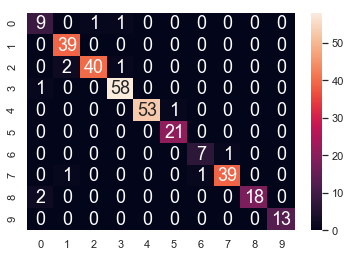

In [79]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 1).fit(x_train, y_train) 

print("Train acc: ", knn.score(x_train, y_train))
print("Test acc: ", knn.score(x_test, y_test))

# creating a confusion matrix 
pred = knn.predict(x_test) 
cm = confusion_matrix(y_test, pred) 
sb.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18})

In [80]:
train_acc = []
test_acc = []
neighbour = np.array([i for i in range(1, 50)])

for N in neighbour:
    knn = KNeighborsClassifier(n_neighbors = N).fit(x_train, y_train) 
    train_acc.append(knn.score(x_train, y_train))
    test_acc.append(knn.score(x_test, y_test))
    

train_acc = np.array(train_acc)
test_acc = np.array(test_acc)

trace1 = go.Scatter(
                x=neighbour,
                y=train_acc, 
                name = 'Train Acc')
        
trace2 = go.Scatter(
                x=neighbour,
                y=test_acc, 
                name = 'Test Acc')
    
data = [trace1, trace2]

layout = dict(
    title = "Accuracy")


fig = go.Figure(data = data)
fig['layout'].update(title = "Accuracy")
iplot(fig)

### 4. Neural Network

#### Loss curve of NN given differen learning rates

In [83]:
from sklearn.neural_network import MLPClassifier
iteration = np.arange(100)
learning_rate = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1]
data = []

for i in range(len(learning_rate)):
    mlp = MLPClassifier(solver='adam', activation='relu',alpha=1e-5,
                        hidden_layer_sizes=(64, 64), random_state=1, 
                        max_iter=100,learning_rate_init=learning_rate[i], 
                        early_stopping = True)
    mlp.fit(x_train, y_train)
    
    trace = go.Scatter(
                    x=iteration,
                    y=mlp.loss_curve_, 
                    name = learning_rate[i])
    data.append(trace)



layout = dict(
    title = "Loss")


fig = go.Figure(data = data)
fig['layout'].update(title = "Loss")
iplot(fig)

Train acc:  0.9983818770226537
Test acc:  0.9611650485436893
4
57
loss:  0.03180698700609047
softmax


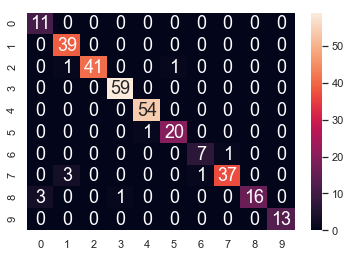

In [84]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='adam', activation='relu',
                    alpha=1e-5,hidden_layer_sizes=(64, 64), 
                    random_state=1, max_iter=100,
                    learning_rate_init=0.006, early_stopping=False)

mlp.fit(x_train, y_train)            
pred = mlp.predict(x_test)
accuracy = mlp.score(x_test, y_test)


print ("Train acc: ", mlp.score(x_train, y_train))
print ("Test acc: ", mlp.score(x_test, y_test))

# creating a confusion matrix 
cm = confusion_matrix(y_test, pred) 
sb.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18})


print (mlp.n_layers_)
print (mlp.n_iter_)
print ("loss: ", mlp.loss_)
print (mlp.out_activation_)

### 5. Support Vector Machine

0.9741100323624595


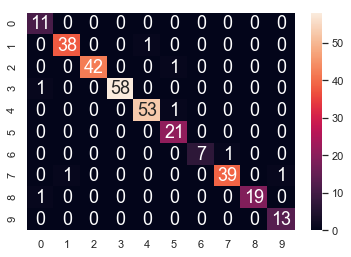

In [85]:
# training a linear SVM classifier 
from sklearn.svm import SVC 
svm = SVC(kernel = 'rbf', C = 10).fit(x_train, y_train) 
pred = svm.predict(x_test) 
# model accuracy for X_test 
accuracy = svm.score(x_test, y_test) 
print (accuracy)
# creating a confusion matrix 
cm = confusion_matrix(y_test, pred) 
sb.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18})

### 6. Gradient Boosting

Train acc: 1.000
Test acc: 0.958


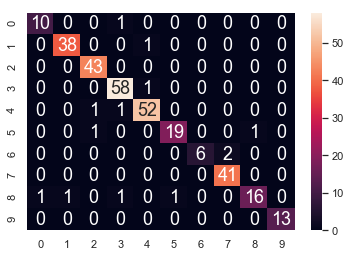

In [86]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

learning_rates = [0.03]
for learning_rate in learning_rates:
        gb = GradientBoostingClassifier(n_estimators=8, learning_rate = learning_rate, max_features=5, max_depth = 10, random_state = 5)
        gb.fit(x_train, y_train)
        print("Train acc: {0:.3f}".format(gb.score(x_train, y_train)))
        print("Test acc: {0:.3f}".format(gb.score(x_test, y_test)))

pred = gb.predict(x_test)
cm = confusion_matrix(y_test, pred) 
sb.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18})

### 7.Gaussian Process

Train acc:  0.9870550161812298
Train acc:  0.9611650485436893


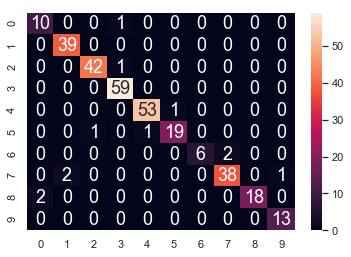

In [87]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

gpc = GaussianProcessClassifier(random_state=0).fit(x_train, y_train)
print("Train acc: ", gpc.score(x_train, y_train))
print("Train acc: ", gpc.score(x_test, y_test))
pred = gpc.predict(x_test)
cm = confusion_matrix(y_test, pred) 
sb.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18})

### Combine all the prediction of the above model, and take a weighted majority vote

Multi-Model prediction acc:  0.9838187702265372


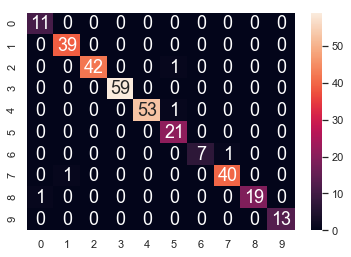

In [88]:
m1 = dectree.predict(x_test).reshape(-1, 1)
m2 = RF.predict(x_test).reshape(-1, 1)
m3 = knn.predict(x_test).reshape(-1, 1)
m4 = mlp.predict(x_test).reshape(-1, 1)
m5 = svm.predict(x_test).reshape(-1, 1)
m6 = gb.predict(x_test).reshape(-1, 1)
m7 = gpc.predict(x_test).reshape(-1, 1)


m = np.concatenate((m1,
                    m2, m2,
                    m3,
                    m4,
                    m5, m5, m5,m5,
                    m6, 
                    m7,
                    y_test.reshape(-1, 1)),
                   
                    axis=1)

pred_df = pd.DataFrame(m)
final_pred = pred_df.mode(axis=1).loc[:, 0]


combined_acc = 1 - np.count_nonzero(final_pred-y_test)/len(y_test)
print("Multi-Model prediction acc: ", combined_acc)
cm = confusion_matrix(y_test, final_pred) 
sb.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18})

In [89]:
acc_list = [('DT', dectree.score(x_test, y_test)),
            ('RF', RF.score(x_test, y_test)),
            ('KNN', knn.score(x_test, y_test)),
            ('NN', mlp.score(x_test, y_test)),
            ('SVM', svm.score(x_test, y_test)), 
            ('GB', gb.score(x_test, y_test)),
            ('GPC', gpc.score(x_test, y_test)),
            ('Ensembled model', combined_acc)]

In [90]:
import plotly.plotly as py
import plotly.graph_objs as go

x = [var[0] for var in acc_list]
y = [round(var[1], 4) for var in acc_list]

data = [go.Bar(
            x=x,
            y=y,
            text=y,
            textposition = 'auto',
            marker=dict(
                color='rgb(49,130,189)'
            )
        )]


layout = go.Layout(
    title='Prediction Accuracy',
    font=dict(family='Courier New, monospace', size=18, color='#7f7f7f'),

    bargap=0.15,

)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [91]:
test = dataset.sample()
test

,COUNTRY,YEAR,HAPPINESS,LOG GDP PER CAPITA,SOCIAL SUPPORT,LIFE EXPECTANCY,FREEDOM,GENEROSITY,PERCEPTIONS OF CORRUPTION,POSITIVE AFFECT,NEGATIVE AFFECT,CONFIDENCE IN NATIONAL GOVERNMENT,DEMOCRATIC QUALITY,DELIVERY QUALITY,GINI,REGION
1461,United Kingdom,2008,6.986464,10.542795,0.953839,69.772842,0.759144,0.320797,0.547769,0.818951,0.218297,0.324166,0.907858,1.704908,0.504174,Western Europe


In [93]:
world_Meandata = np.array(mean_df.loc['World Mean'])
test_ar = np.array(test).squeeze()
test_data = test_ar[2:15]

stat = ((test_data - world_Meandata)/world_Meandata * 100).reshape(1, -1)
stat_df = pd.DataFrame(stat, columns=featureList)
stat_df

,HAPPINESS,LOG GDP PER CAPITA,SOCIAL SUPPORT,LIFE EXPECTANCY,FREEDOM,GENEROSITY,PERCEPTIONS OF CORRUPTION,POSITIVE AFFECT,NEGATIVE AFFECT,CONFIDENCE IN NATIONAL GOVERNMENT,DEMOCRATIC QUALITY,DELIVERY QUALITY,GINI
0,25.2054,11.9193,16.3218,8.88396,1.21922,969.322,-24.9631,13.7431,-12.6814,-35.1669,-1613.1,902.887,14.585


In [94]:
import plotly.plotly as py
import plotly.graph_objs as go

data = []
for R in regionList:
    
    trace = go.Scatterpolar(
      r = percentage_df.loc[R][plotted_var],
      theta = plotted_var,
      fill = 'toself',
      name = R)
    data.append(trace)

    

trace = go.Scatterpolar(
      r = stat_df.iloc[0][plotted_var],
      theta = plotted_var,
      fill = 'toself',
      name = 'Sample Country')
data.append(trace)
    
    
    
layout = go.Layout(
  polar = dict(
    radialaxis = dict(
      visible = True,
      range = [-30, 50]
    )
  ),
  showlegend = True, legend=dict(x=1, y=1.2)
)

fig = go.Figure(data=data, layout=layout)
fig['layout'].update(height=500, width=1000)
iplot(fig)

In [95]:
x = classData[featureList].copy()
y = np.array(classData[["REGION"]].copy())
y = np.squeeze(y)
# scaling the data
# mean = 0, std = 1
scaler = StandardScaler()
x = scaler.fit_transform(x)

# test = 20% of total data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

# ------ Scaling ---------- #

test_sample = test[featureList]
test_sample = np.array(test_sample)
test_sample = scaler.transform(test_sample)



In [96]:
m1 = dectree.predict(test_sample).squeeze()
m2 = RF.predict(test_sample).squeeze()
m3 = knn.predict(test_sample).squeeze()
m4 = mlp.predict(test_sample).squeeze()
m5 = svm.predict(test_sample).squeeze()
m6 = gb.predict(test_sample).squeeze()
m7 = gpc.predict(test_sample).squeeze()
pred_sample = pd.DataFrame(np.array([m1, m2, m2, m2, m3, m4, m5, m6, m7]).reshape(1, -1))
final_pred_sample = pred_sample.mode(axis=1).loc[:, 0]
display(pred_sample)

print("Suggested region: ", regionList[int(final_pred_sample)])
print("Groud truth: ", test.iloc[0][-1])

,0,1,2,3,4,5,6,7,8
0,7,7,7,7,7,7,7,7,7


Suggested region:  Western Europe
Groud truth:  Western Europe
